# telco Customer Churn, EDA + ML

<img src="https://images.squarespace-cdn.com/content/v1/588f9607bebafbc786f8c5f8/1607924812500-Y1JR8L6XP5NKF2YPHDUX/image6.png">

image source: https://www.humanlytics.co/marketing-analytics/customer-churn-in-ecommerce

*Disclaimer: This is an under development notebook, I would like to provide me with your honest and constructive reviews in order to improve my analysis even further. Thank you in advance.* 

“Customer Churn” refers to the loss of customers. That is, if a customer or a client stops taking services from a company, it is said that he/she has churned.

Churn is intimately connected to a company’s performance. The more one learns about buyers’ behavior, the more money one can make. Analyzing customer churn also aids in finding and improving the shortcomings of services provided by the company.

We will try to investigate the dataset and try to answer these questions:

- (1) what is the likelihood of an active customer leaving an organization? 
- (2) what are key indicators of a customer churn? 
- (3) what retention strategies can be implemented based on the results to diminish prospective customer churn?

<a id="s1"></a>
# loading libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


<a id="s2"></a> <br>
# reading the csv file

In [2]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

<a id="s3"></a>
# intial exploration

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


At first glance, we have many categorical variables and some numerical ones. CustomerID is a unique identifier which means it will be not be a useful feature. Lets inspect all the features.

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

It seems we have many categorical variables such as gender, SeniorCitizen, Partner and some numerical features like, TotalCharges, MonthlyCharges. Finally the categorical variable Churn is the one that matters most, whether or not the customer has churned. We need to inspect the datatypes for each variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Lets try to inspect all the different types from the features together.

In [6]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

<a id="s3_1"></a>
# exploring all the values per feature

In [7]:
for elem in df.columns[1:]:
    print(df[elem].value_counts())
    print("\n")

Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: 

So far we have many categorical variables, seems that the feature TotalCharges should be float data type. However, it is object instead. It needs to be changed. Lets try to inspect it.

<a id="s3_3_3"></a>
# Preprocessing

In [8]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
### preprocessing the TotalCharges, changing the null values with zero

df.loc[ df['TotalCharges'] == ' ', 'TotalCharges'] = 0
df["TotalCharges"] = df["TotalCharges"].astype("float64") 

Done, But something else caught my eye, what about SeniorCitizen feature? It is int64, and it is a categorical feature? Needs to be Object type instead.

In [10]:
### preprocessing the senior citizens feature, converting from int64 to object type

df["SeniorCitizen"] = df["SeniorCitizen"].astype("object") 

<a id="s3_2"></a>
# Checking for NA values

In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We have no missing values! That is good news! :D

<a id="s3_3"></a>
# Initial EDA, trying to understand the data

Lets try to observe how the data, we need to see some descriptive statistics

In [12]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


I don't have something to say here. I need to visualize the distributions for all numerical variables to check out the distributions.

<a id="s3_3_0"></a>
# Exploring the Churn

<AxesSubplot:>

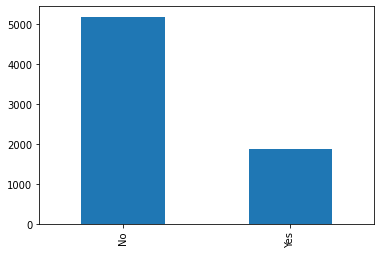

In [13]:
df['Churn'].value_counts().plot(kind="bar")

<a id="s3_3_1"></a>
# Exploring the numerical features

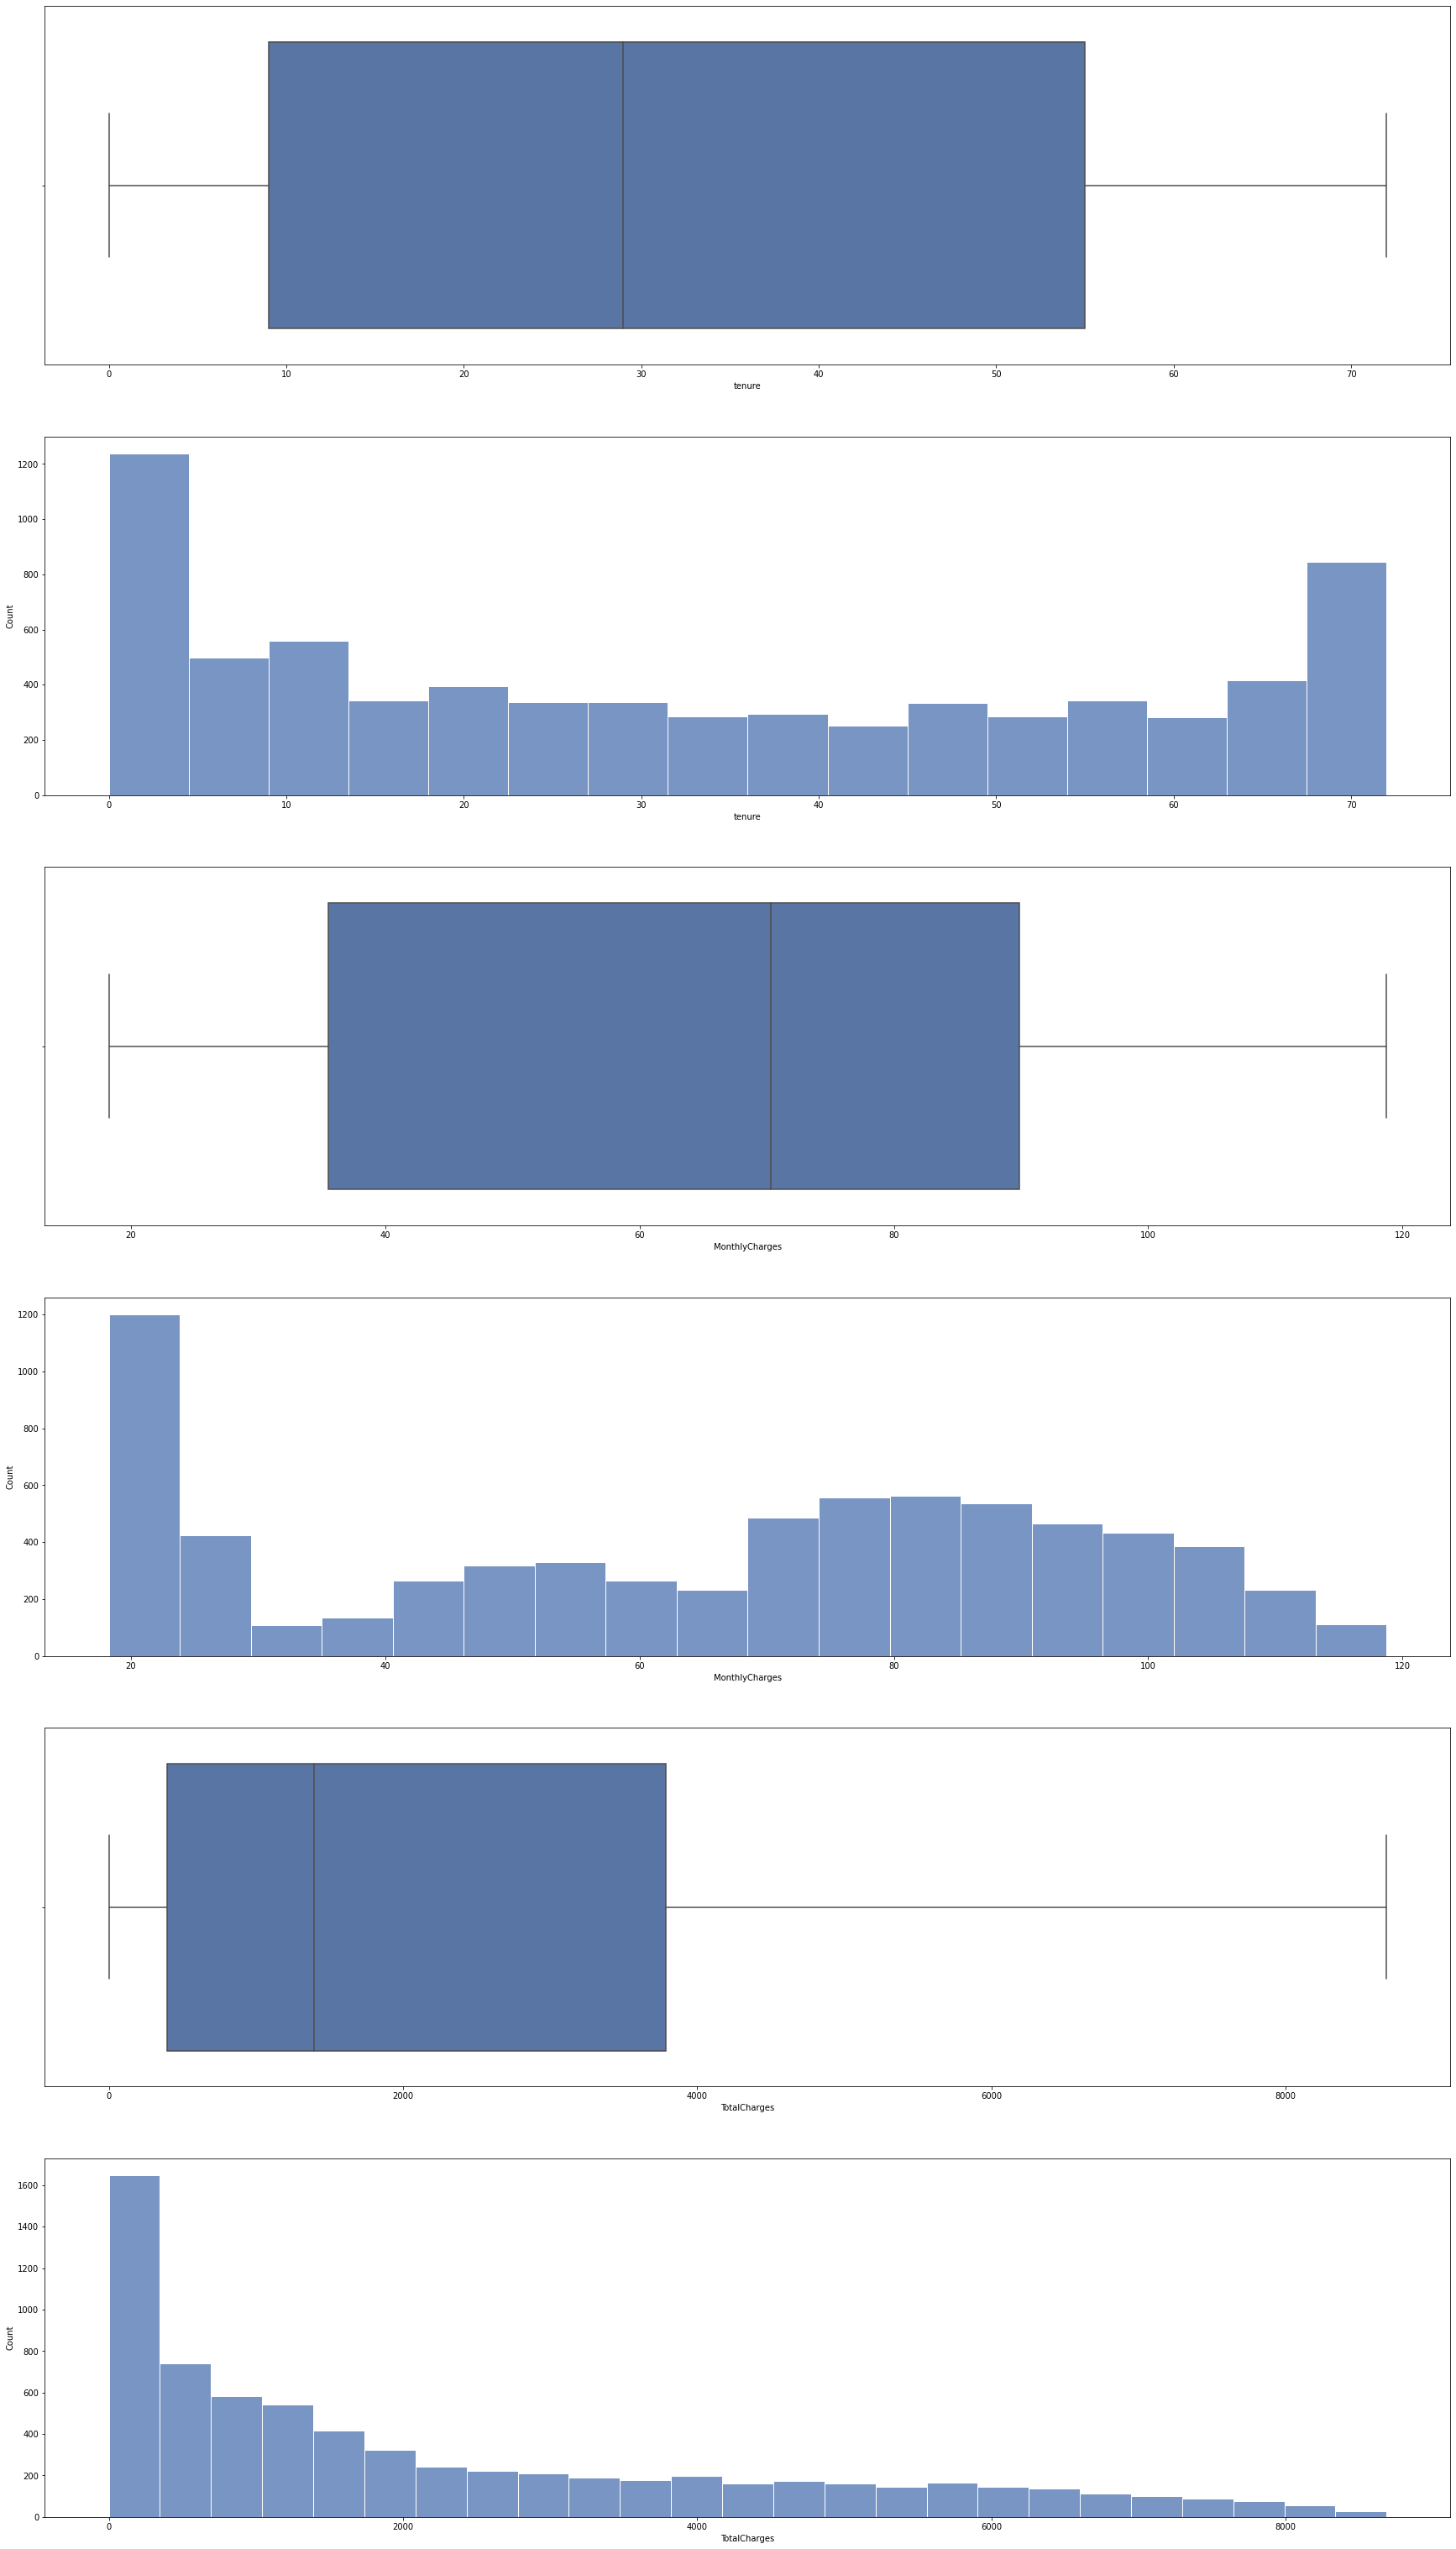

In [14]:
fig, ax = plt.subplots(6, figsize=(30, 55))
sns.set(font_scale=2)

g=sns.boxplot(data=df, x="tenure", ax=ax[0])
g=sns.histplot(data=df, x="tenure", ax=ax[1])


g=sns.boxplot(data=df, x="MonthlyCharges", ax=ax[2])
g=sns.histplot(data=df, x="MonthlyCharges", ax=ax[3])


g=sns.boxplot(data=df, x="TotalCharges", ax=ax[4])
g=sns.histplot(data=df, x="TotalCharges", ax=ax[5])

- We see we have many customers who stay less than 10 months in the company. However, they is a small spike in customers who are loyal enough to stay up to 72 months.

- The monthly charges have a right skewed distribution, there are lots of small charges from 20 to 25 which means a huge proportion of customers have around $20 - $25 monthly charges and less customers have more than 25 dollars.


- The same pattern appears in TotalCharges. There is a huge majority of TotalCharges range between 0 to 2000 dollars and a smaller amounts of monthly charges above 2000 dollars.

- Finally all the numerical features  have a right skewed distribution.

<a id="s3_4"></a>
# Exploring Churn with other numerical variables

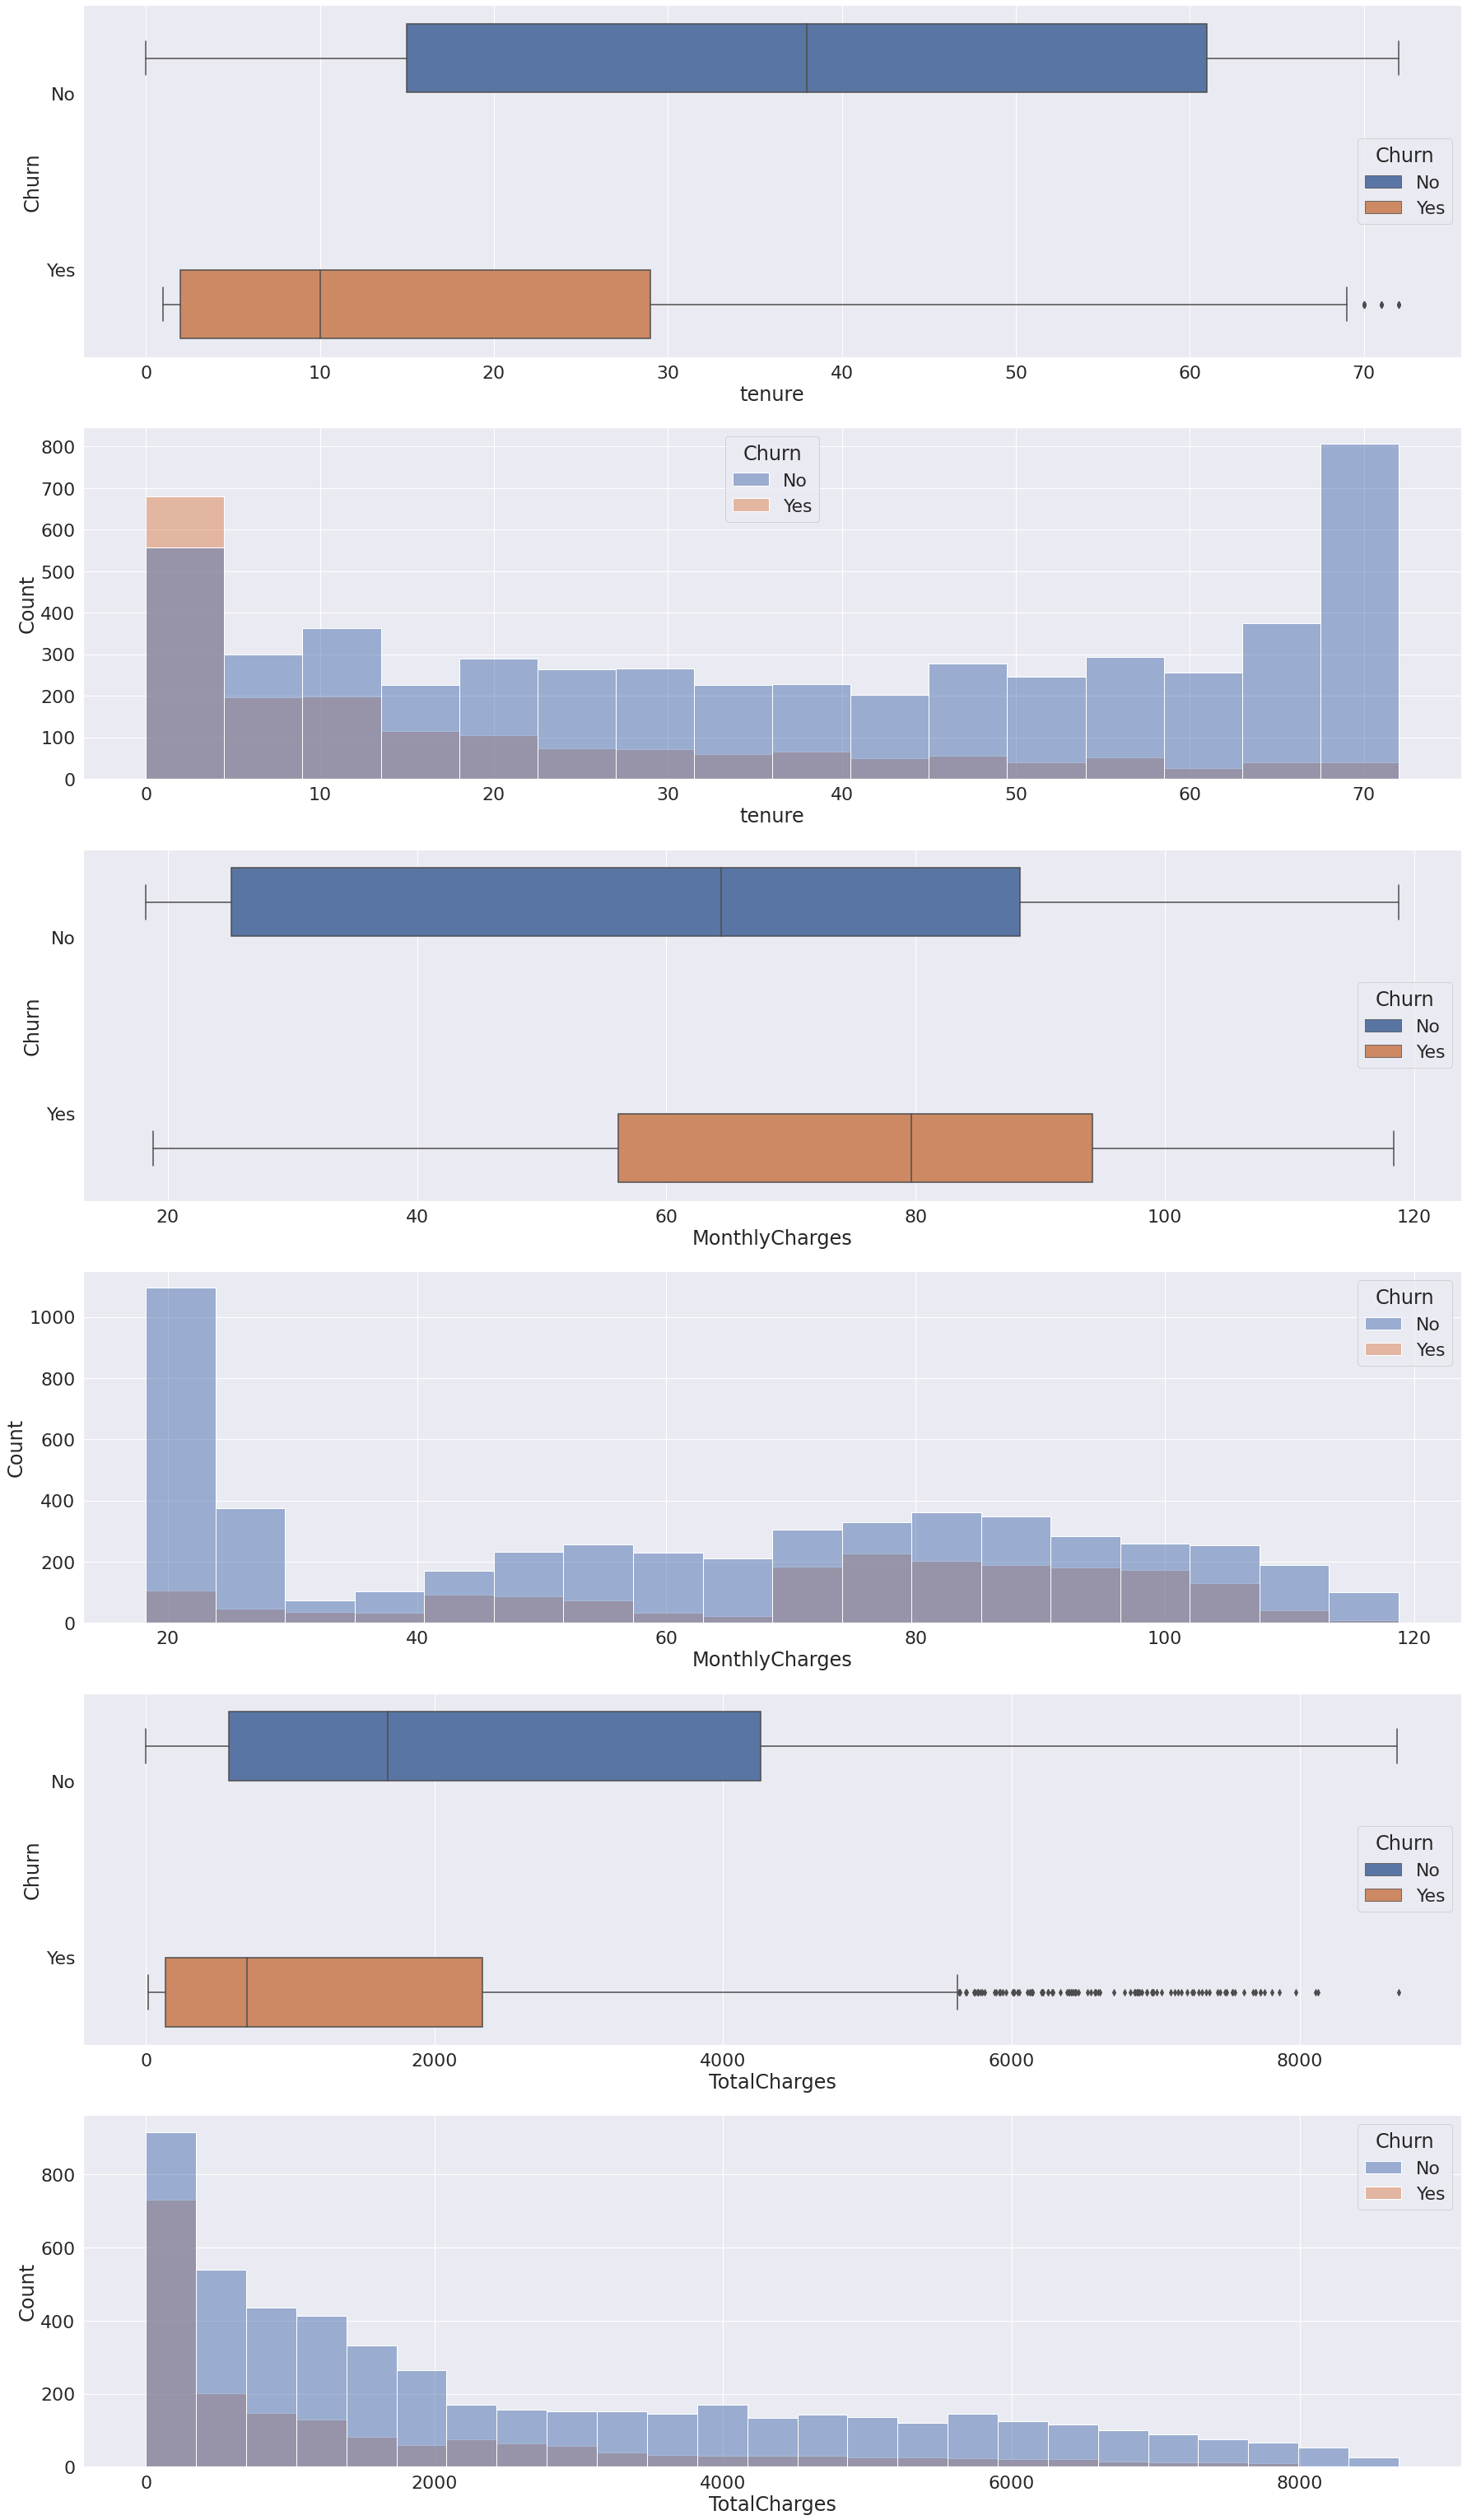

In [15]:
fig, ax = plt.subplots(6, figsize=(30, 55))
sns.set(font_scale=2)

g=sns.boxplot(data=df, x="tenure", y="Churn", ax=ax[0], hue="Churn")
g=sns.histplot(data=df, x="tenure", ax=ax[1], hue="Churn")


g=sns.boxplot(data=df, x="MonthlyCharges", y="Churn", ax=ax[2], hue="Churn")
g=sns.histplot(data=df, x="MonthlyCharges", ax=ax[3], hue="Churn")


g=sns.boxplot(data=df, x="TotalCharges", y="Churn", ax=ax[4], hue="Churn")
g=sns.histplot(data=df, x="TotalCharges", ax=ax[5], hue="Churn")

#### Lets try to read the charts above, the visualizations of numerical features with customers who churn

- For both numerical variables, tenure and TotalCharges the Churn follows the same pattern, many customers leave very early and with small total charges respectively and compared to the rest of their respective populations.

- The opposite happens with the MOnthlyCharges, customers who Churn, will leave the company when the monthly charges are rising above 80 dollars.

<a id="s3_4_4"></a>
# Exploring the categorical variables

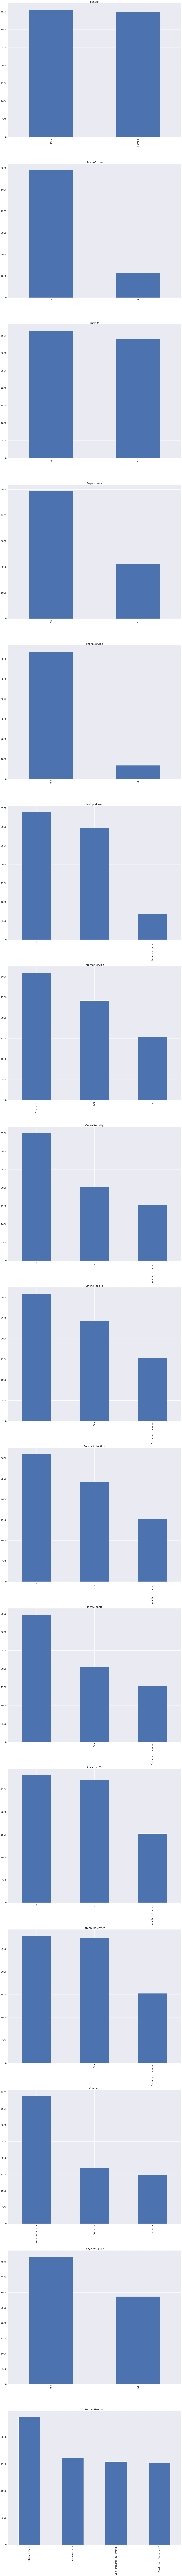

In [16]:
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

fig, ax = plt.subplots(len(categorical_variables), figsize=(30, 450))

for elem, i in zip(categorical_variables, range(len(categorical_variables))):
    
    df[elem].value_counts().plot(kind='bar', ax=ax[i], title=elem)

<a id="s3_4_4_4"></a>
# Observations from the categorical barplots

- Genders, seems we have equal number of both males and females, and both show equal amount of churned customers.

- We have young customers compared to senior.

- Customers with or without partners are about the same.

- Seems we have more customers without dependent members than those who have.

- Also the majority of customers who don't have a phone service are way more than those who have.

- Customers who have internet service, prefer mostly DSL or Fiber optic.

- There is a common pattern in the features MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport. It is illustated that most of the customers prefer not to have access to these features than those who have.

- The features, StreamingMovies and StreamingTV has similar barplots, which means there is an equal amount of customers who prefer to either prefer these services or not to.

- In general customers prefer month-to-month contracts wcompared to other types such as two year or one year contracts.

- Finally, most customers would rather have Paperless billing than any other form and seems they use all the different forms of banking transactions such with Electronic Check being the majority.

<a id="s3_5"></a>
# Exploring Churn with other categorical variables

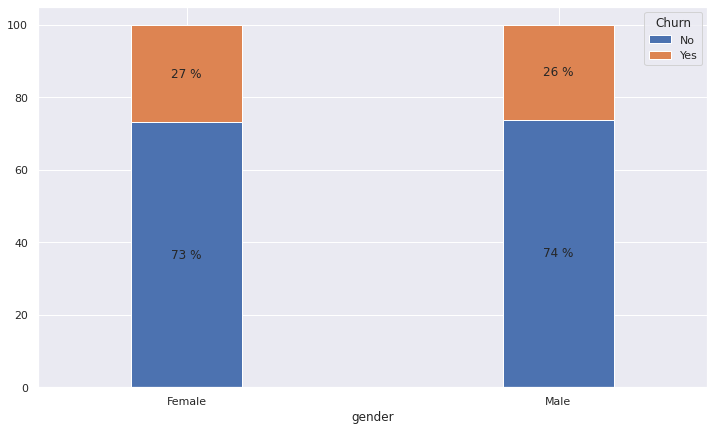

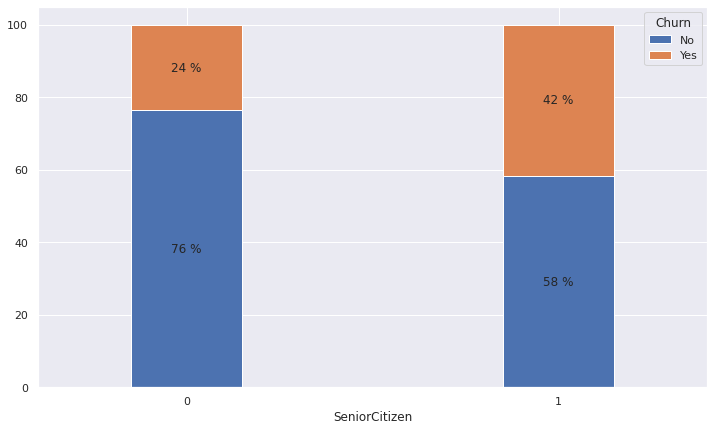

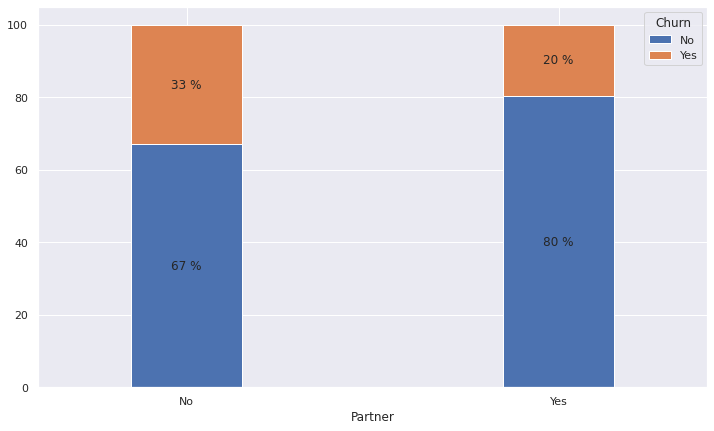

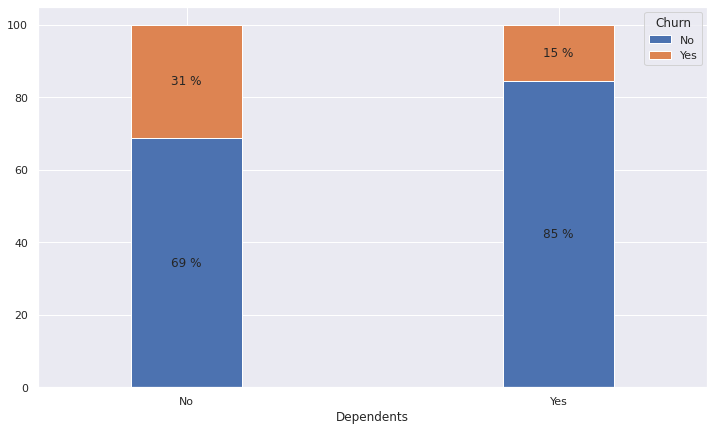

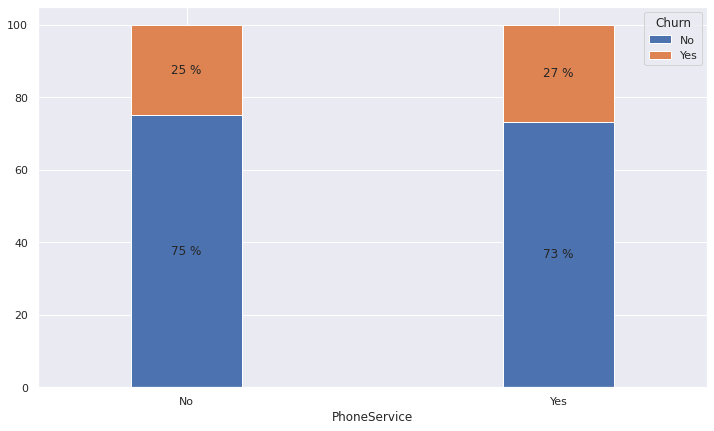

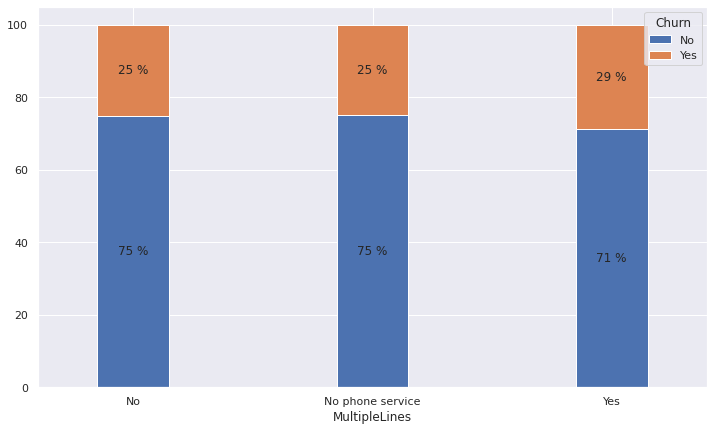

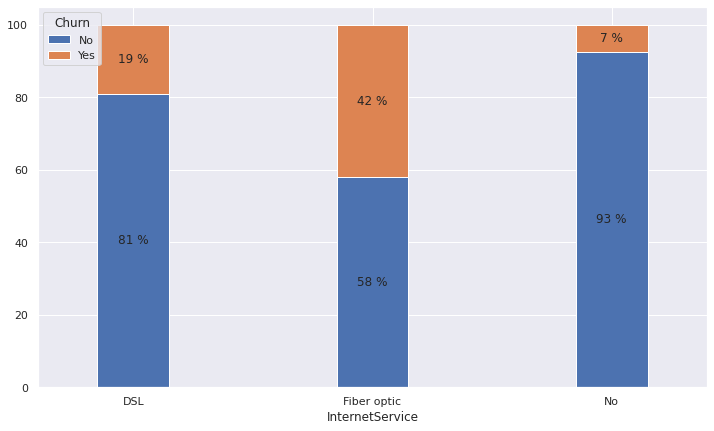

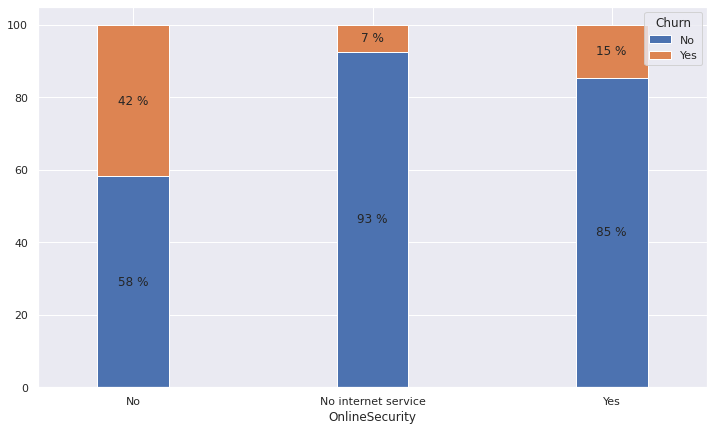

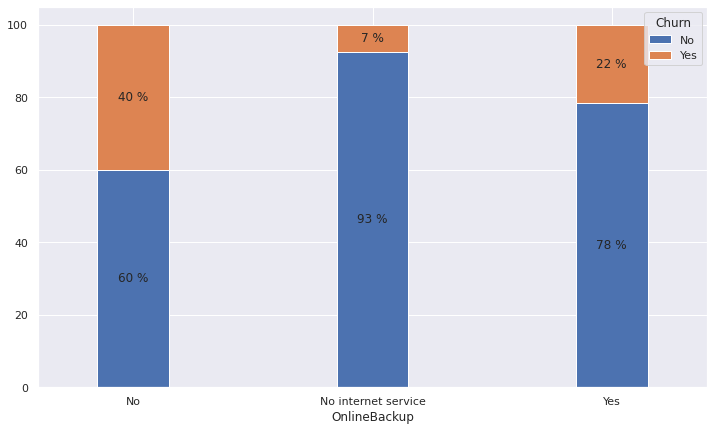

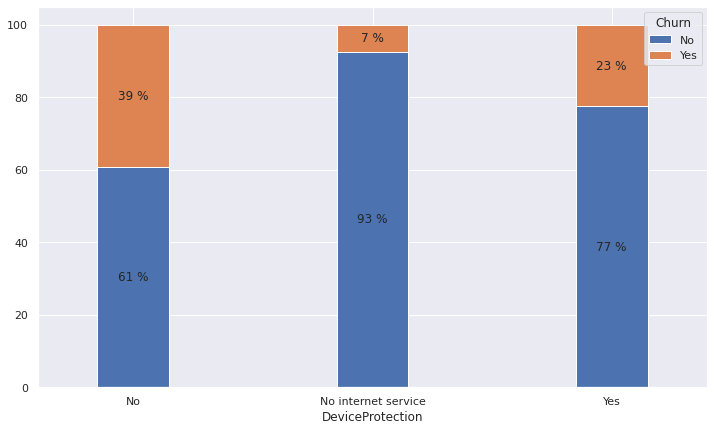

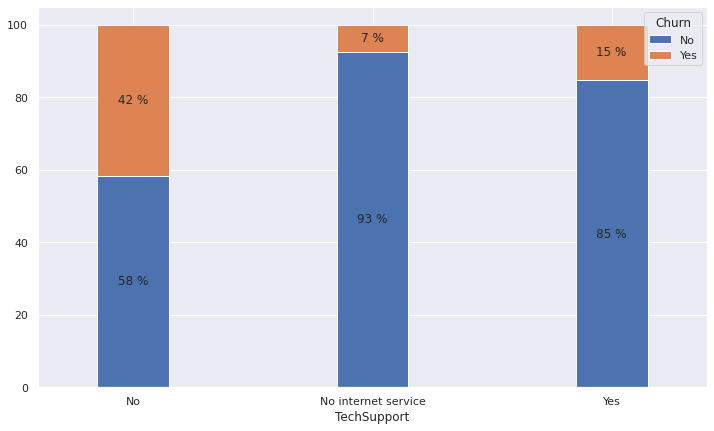

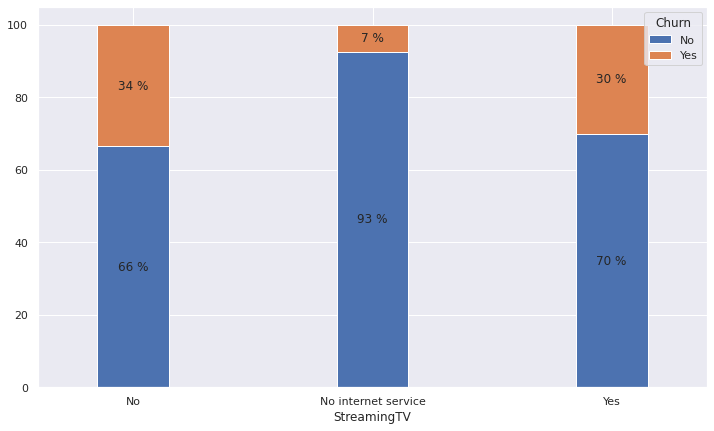

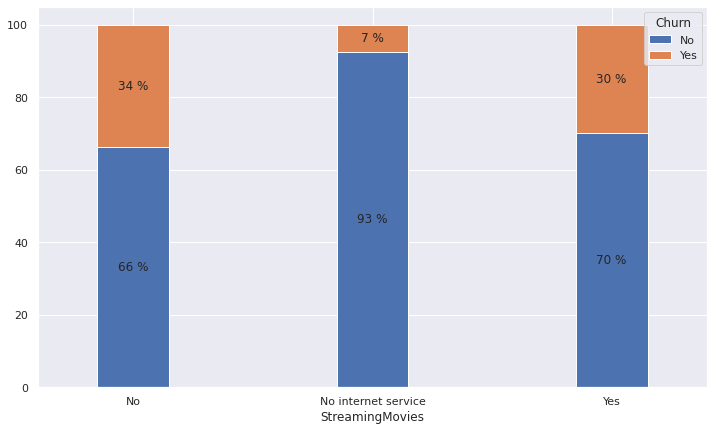

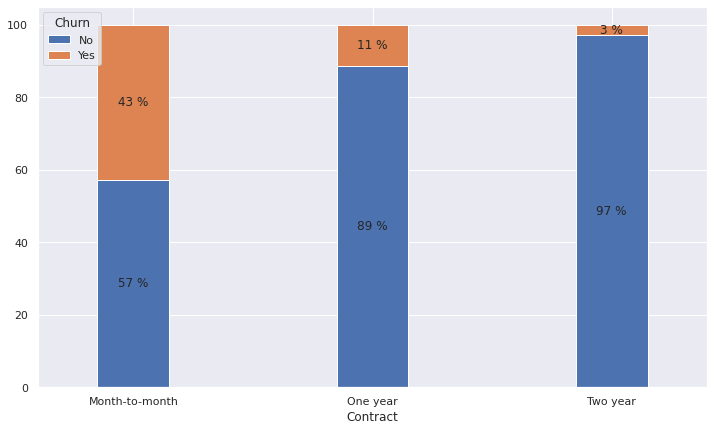

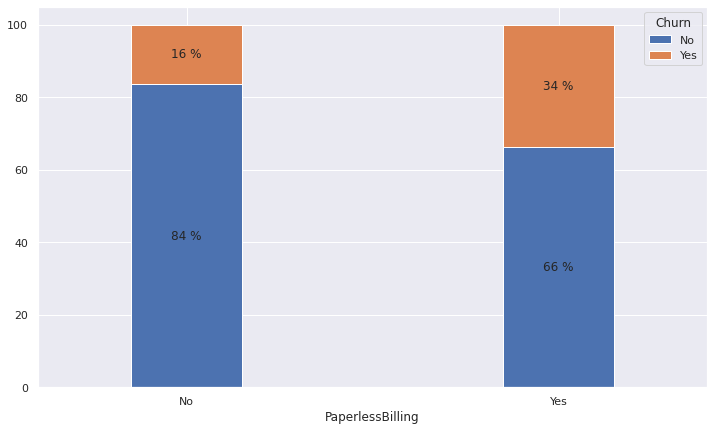

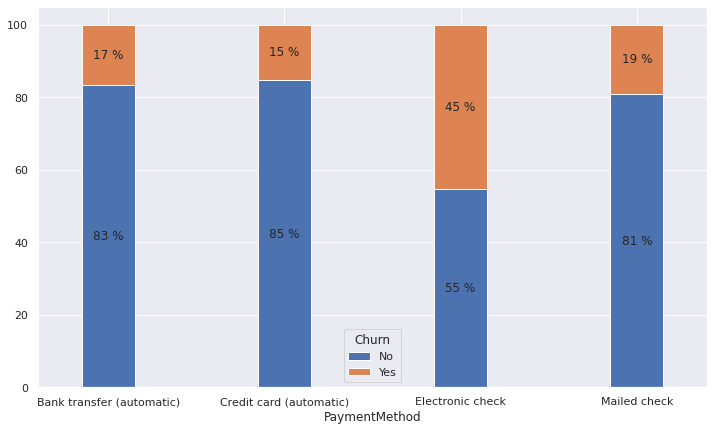

In [17]:
sns.set(font_scale=1)

for i in range(len(categorical_variables)):
    
    counts = df.groupby([categorical_variables[i],'Churn']).size().unstack()
    
    
    ax = (counts.T*100.0 / counts.T.sum()).T.plot(
        kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7))

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

<a id="s3_5_1"></a>
# Observations from bivariate plots, categorical features and Churn

- Gender, both male and female customers have approximately the same amount of those who Churn. 

- The senior customers are more prone to leave the company compared to non-senior.

- Customers who don't have partner have the tedency to leave the company compared to those who don't

- Customers who leave the company have no dependents. On the other hand, those who have will not show leave that much the company

- Across the categories of PhoneService and MultipleLines, the customers show the same proportion for those who leave the company

- It is important to highlight, that the customers who use fiber optic as InternetService, will leave the company will the highest churn rate compared to other internetService methods

- Customers who don't use or don't have OnlineSecurity, OnlineBackup, OnlineProtection and TechSupport will show  higher probability to Churn compared to the rest of the respective groups. 

- Moreover the features StreamingMovies and StreamingTV show the same churn rate

- Customers who prefer to have PaperlessBilling will have higher Churn probability from those who don't.

- Last but not least, it should be noted that those who use ElectronicChecks for their transactions inside the company will show great tedency to leave the company than those who don't.

<a id="s4_1"></a>
# Converting categorical variables into numerical with One-Hot-Encoding

In [18]:
# converting the categorical features
df_dummies = pd.get_dummies(df[categorical_variables])

# adding the numerical features
df_dummies[['tenure', 'MonthlyCharges', 'TotalCharges']] = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

df_dummies['Churn'] = df['Churn']
df_dummies['Churn'] = df_dummies['Churn'].map({'No': 0, 'Yes': 1})
df_dummies.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,29.85,29.85,0
1,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,34,56.95,1889.50,0
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,2,53.85,108.15,1
3,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,0,0,45,42.30,1840.75,0
4,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,2,70.70,151.65,1


<a id="s4_2"></a>
# Investigating Correlations between variables

<AxesSubplot:>

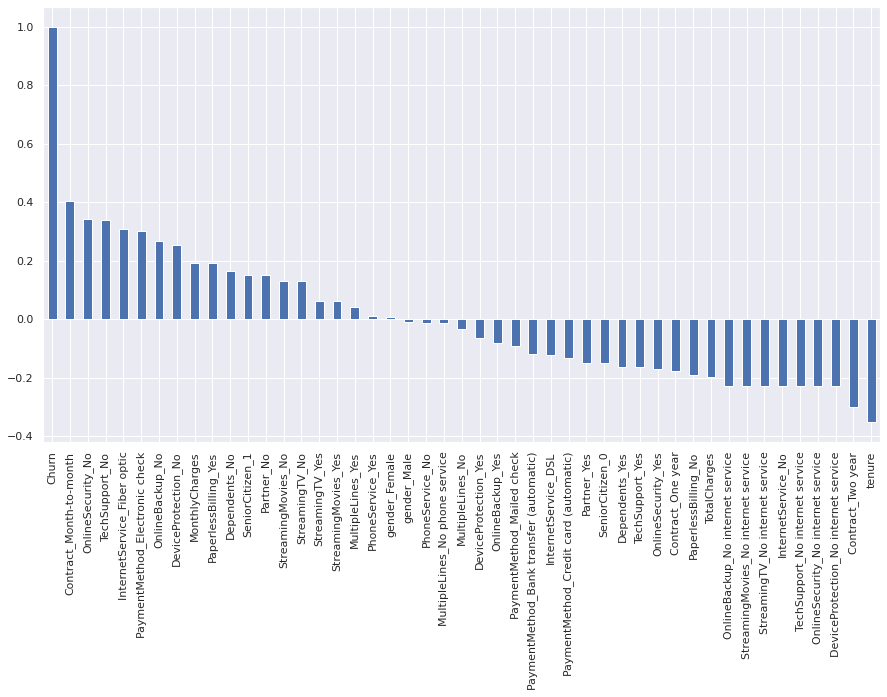

In [19]:
#Get Correlation of "Churn" with other variables:
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

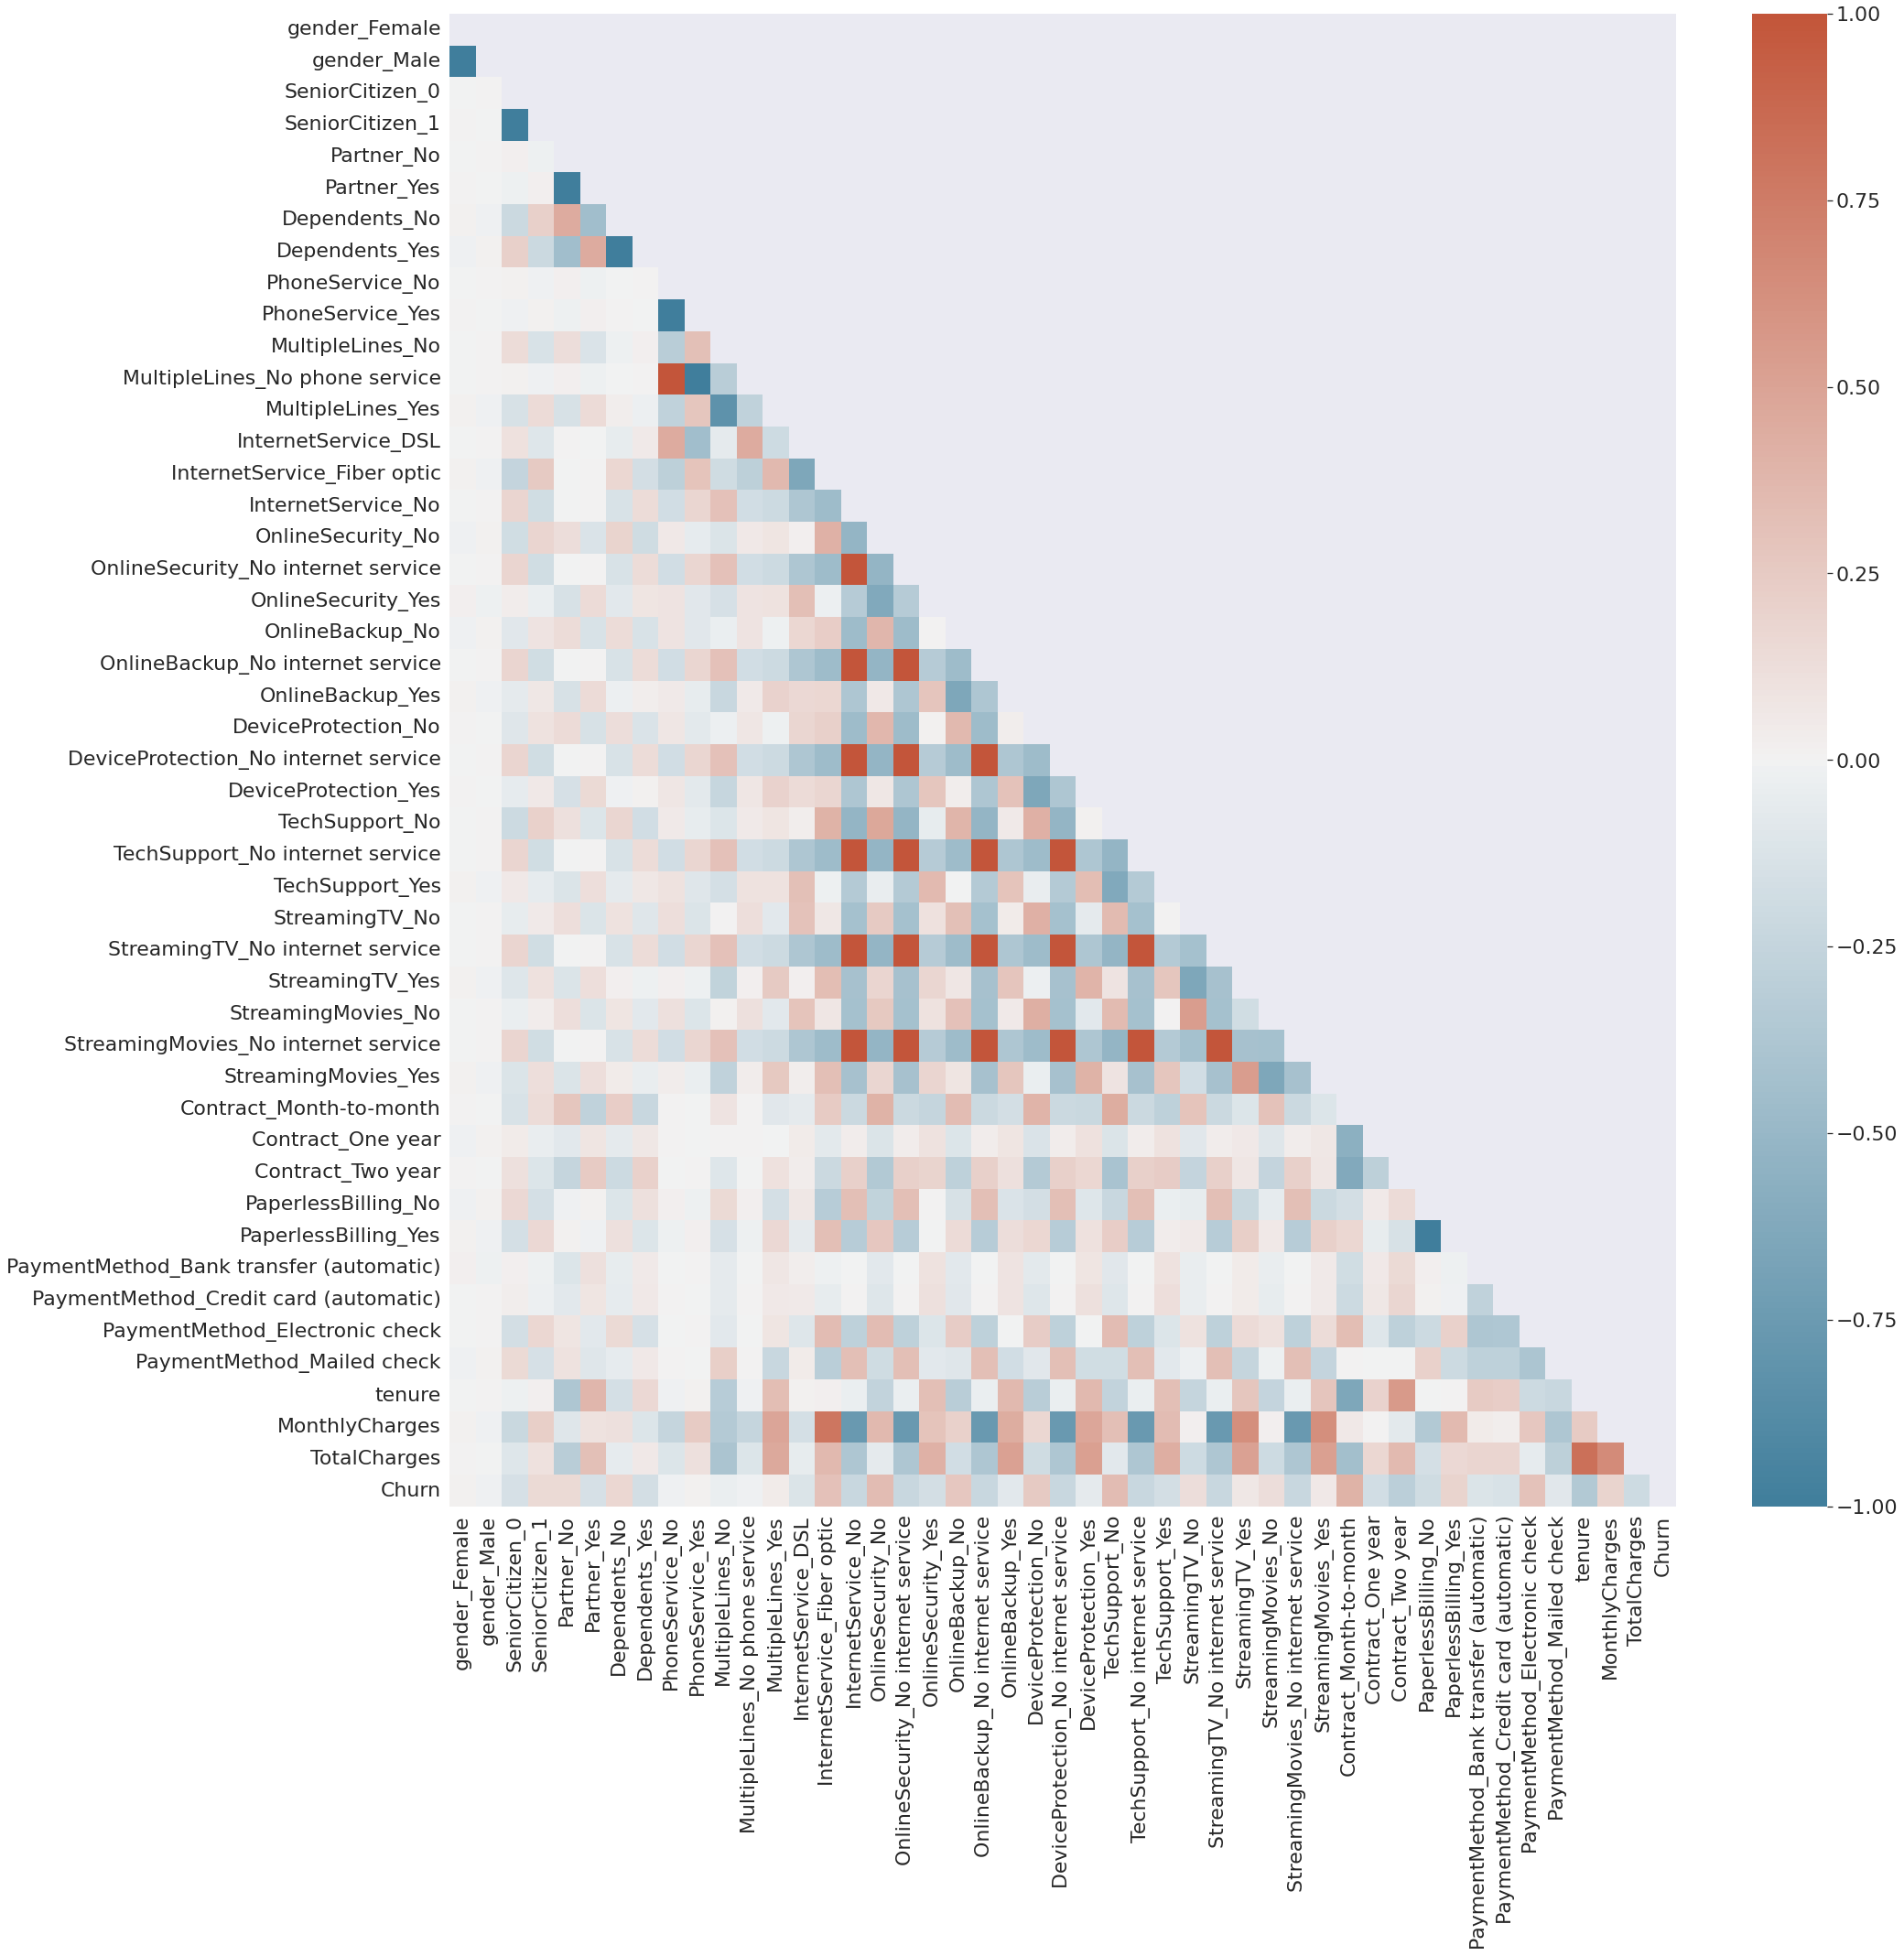

In [20]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(30,30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(df_dummies.corr(), dtype=bool))
sns.heatmap(df_dummies.corr(), mask=mask, cmap=cmap)

<a id="s5"></a>
# Machine Learning models

I will try to model the customers who will leave the company (aka Churn) based on the above dataset. I will build the following models:

- logistic regression
- svm
- knn
- xgboost
- random forest
- NaiveBayes

<a id="s5_1"></a>
# Preparation before model training

In [21]:
train_columns = df.columns.to_list()

for elem in ["customerID","Churn"]:
    train_columns.remove(elem)

<a id="s5_2"></a>
# Encoding categorical features

In [22]:
# converting the categorical features
df_dummies = pd.get_dummies(df[categorical_variables])

# adding the numerical features
df_dummies[['tenure', 'MonthlyCharges', 'TotalCharges']] = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

df_dummies['Churn'] = df['Churn']
df_dummies['Churn'] = df_dummies['Churn'].map({'No': 0, 'Yes': 1})


y = df_dummies['Churn']
X = df[train_columns]


from sklearn.preprocessing import LabelEncoder

for col in train_columns:
    
    le = LabelEncoder()
    le.fit(X[col].to_list())
    X[col] = le.transform(X[col])


clf_stats_df = pd.DataFrame(columns=["clf_name", "F1-score", "auc-score"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<a id="s5_3"></a>
# Baseline Logistic Regression


Stratified Fold: 0


Stratified Fold: 1


Stratified Fold: 2


Stratified Fold: 3


Stratified Fold: 4


Stratified Fold: 5


Stratified Fold: 6


Stratified Fold: 7


Stratified Fold: 8


Stratified Fold: 9


              precision    recall  f1-score   support

           0       0.84      0.92      0.88       518
           1       0.70      0.51      0.59       187

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705


CV f1_score 0.7355228156333129

CV roc_auc_score 0.8498234674705263

elapsed time in seconds:  3.7788913249969482



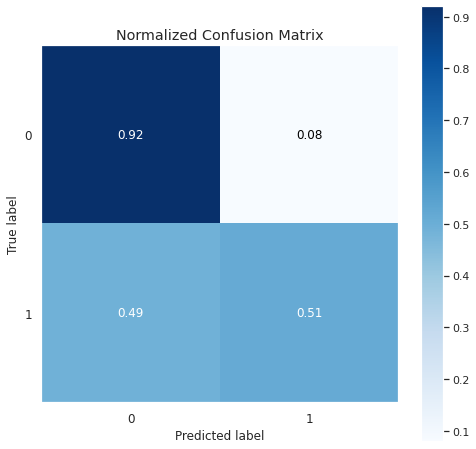

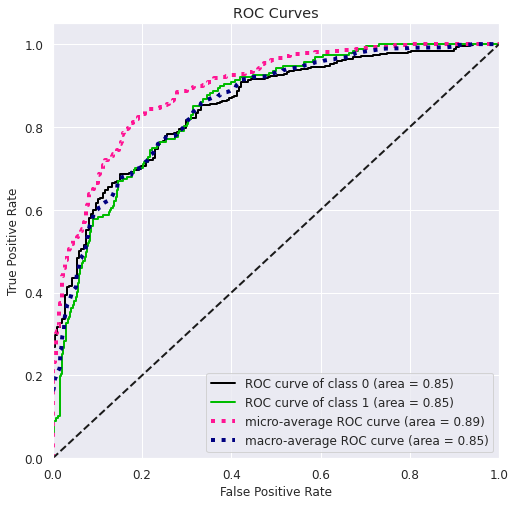

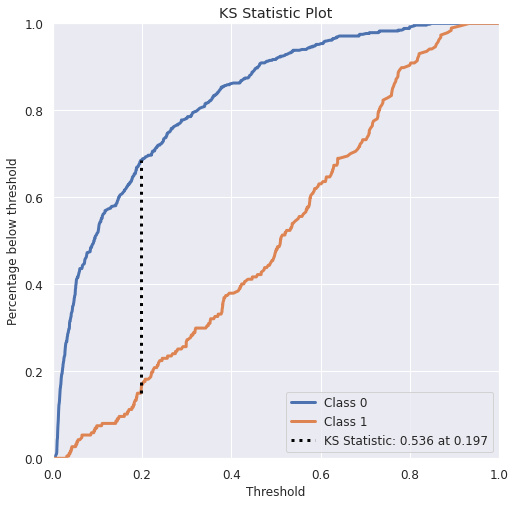

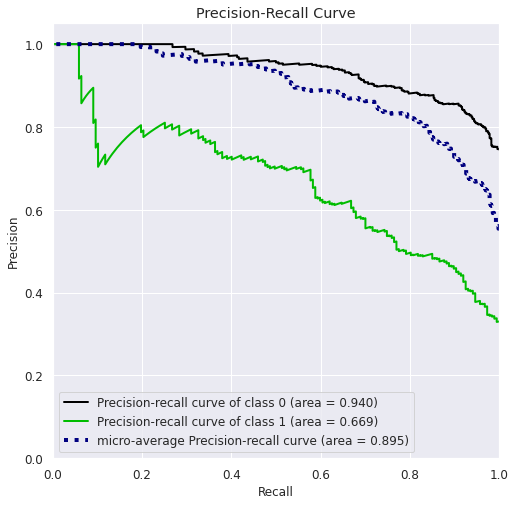

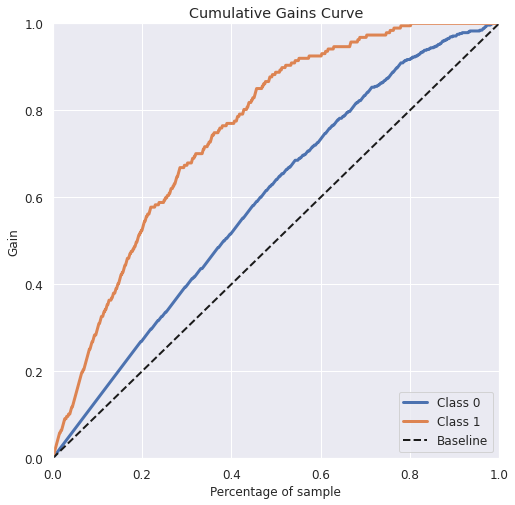

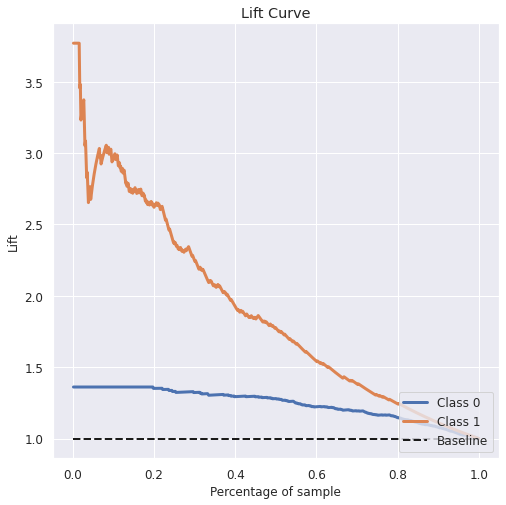

In [23]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import seaborn as sns
import scikitplot as skplt

# create a 90/10 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.1, stratify = y)

from sklearn.linear_model import LogisticRegression

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])
#predictions_test_xgb = np.zeros(len(test_df))
num_of_folds = 10
num_fold = 0
    #feature_importance_df = pd.DataFrame()

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Stratified Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_logit = LogisticRegression(random_state=42, max_iter=500)

    clf_stra_logit.fit(xtrain_stra, ytrain_stra)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    #fold_importance_df["fold"] = n_fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions = clf_stra_logit.predict(xvalid)
    predictions_probas = clf_stra_logit.predict_proba(xvalid)
    predictions_probas_list += predictions_probas/num_of_folds

    #predictions_test_xgb += clf_stra_xgb.predict_proba(test_df[xtrain.columns])[:,1]/num_of_folds


predictions = np.argmax(predictions_probas_list, axis=1)

print()
print(classification_report(yvalid, predictions))

print()
print("CV f1_score", f1_score(yvalid, predictions, average = "macro"))

print()
print("CV roc_auc_score", roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro"))

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

#sns.set(rc={'figure.figsize':(12, 38)})
#clf_stra_logit.plot_importance(clf_stra_logit, title='Feature importance', xlabel='F score', ylabel='Features')

clf_stats_df = clf_stats_df.append({"clf_name": "clf_stra_logit",
                     "F1-score":f1_score(yvalid, predictions, average = "macro"),
                     "auc-score": roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro")}, ignore_index=True)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()
import gc
gc.collect();

<a id="s5_3_2"></a>
# Baseline SVM


Stratified Fold: 0


Stratified Fold: 1


Stratified Fold: 2


Stratified Fold: 3


Stratified Fold: 4


Stratified Fold: 5


Stratified Fold: 6


Stratified Fold: 7


Stratified Fold: 8


Stratified Fold: 9


              precision    recall  f1-score   support

           0       0.76      0.99      0.86       518
           1       0.86      0.13      0.22       187

    accuracy                           0.76       705
   macro avg       0.81      0.56      0.54       705
weighted avg       0.79      0.76      0.69       705


CV f1_score 0.5417534299892965

CV roc_auc_score 0.6962298432886669

elapsed time in seconds:  124.34304332733154



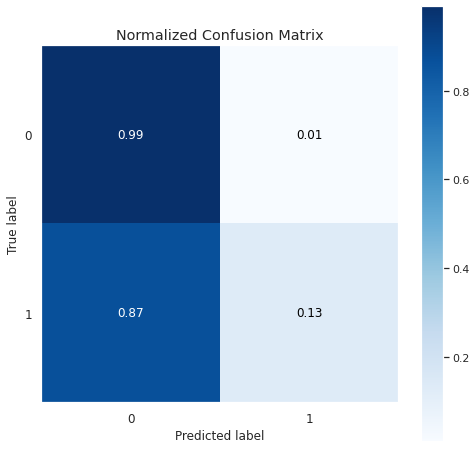

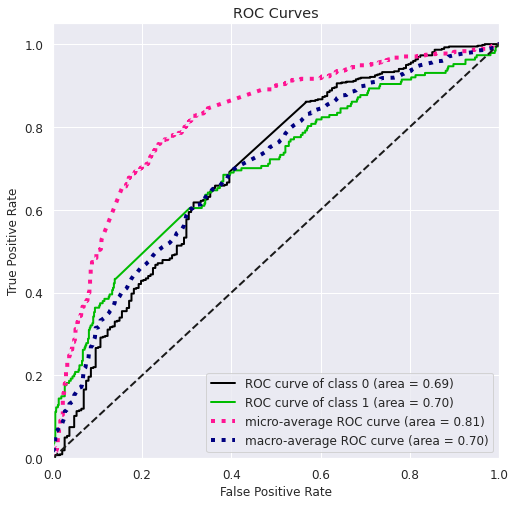

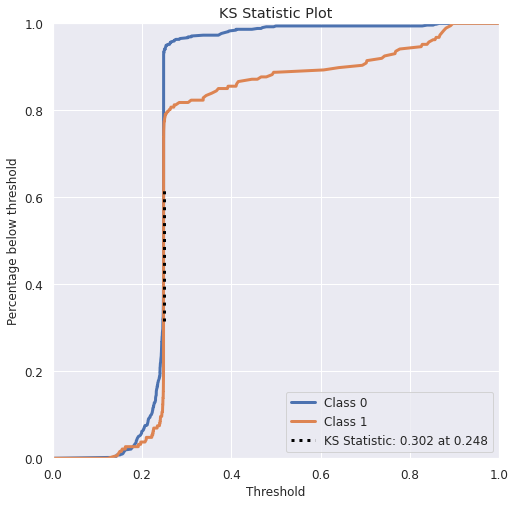

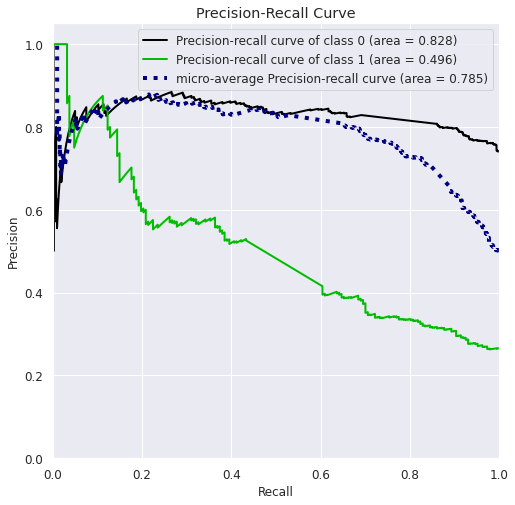

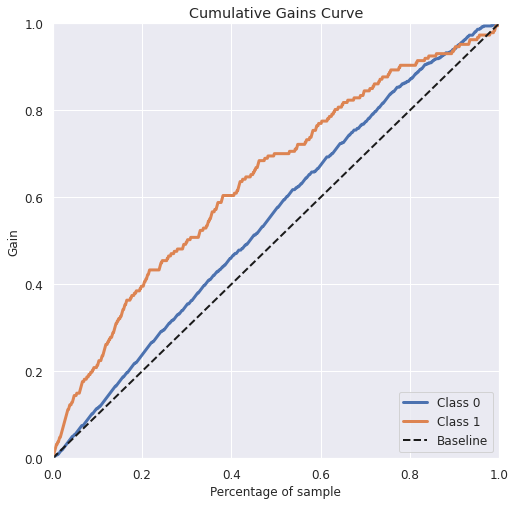

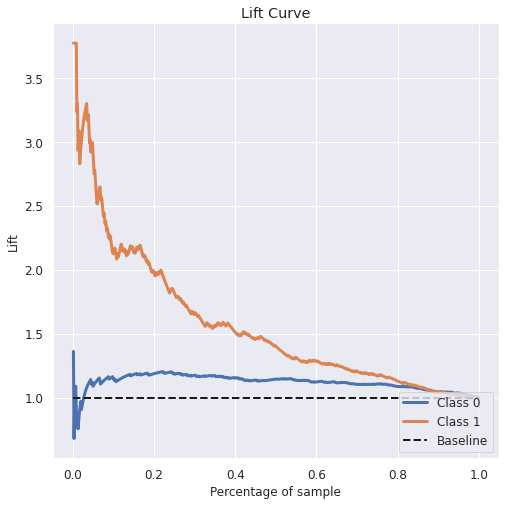

In [24]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import seaborn as sns
import scikitplot as skplt

# create a 90/10 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.1, stratify = y)

from sklearn.svm import SVC

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])
#predictions_test_xgb = np.zeros(len(test_df))
num_of_folds = 10
num_fold = 0
    #feature_importance_df = pd.DataFrame()

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Stratified Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_svc = SVC(random_state=42, gamma='auto', probability=True, max_iter=-1)

    clf_stra_svc.fit(xtrain_stra, ytrain_stra)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    #fold_importance_df["fold"] = n_fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions = clf_stra_svc.predict(xvalid)
    predictions_probas = clf_stra_svc.predict_proba(xvalid)
    predictions_probas_list += predictions_probas/num_of_folds

    #predictions_test_xgb += clf_stra_xgb.predict_proba(test_df[xtrain.columns])[:,1]/num_of_folds


predictions = np.argmax(predictions_probas_list, axis=1)

print()
print(classification_report(yvalid, predictions))

print()
print("CV f1_score", f1_score(yvalid, predictions, average = "macro"))

print()
print("CV roc_auc_score", roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro"))

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

clf_stats_df = clf_stats_df.append({"clf_name": "clf_stra_svc",
                     "F1-score":f1_score(yvalid, predictions, average = "macro"),
                     "auc-score": roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro")}, ignore_index=True)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()
import gc
gc.collect();

<a id="s5_3_1_1"></a>
# Baseline kNN


Stratified Fold: 0


Stratified Fold: 1


Stratified Fold: 2


Stratified Fold: 3


Stratified Fold: 4


Stratified Fold: 5


Stratified Fold: 6


Stratified Fold: 7


Stratified Fold: 8


Stratified Fold: 9


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       518
           1       0.58      0.48      0.52       187

    accuracy                           0.77       705
   macro avg       0.70      0.68      0.69       705
weighted avg       0.76      0.77      0.76       705


CV f1_score 0.6860637713029136

CV roc_auc_score 0.7761753349988645

elapsed time in seconds:  3.2301900386810303



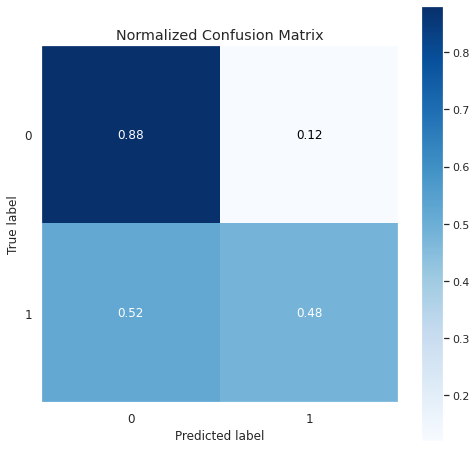

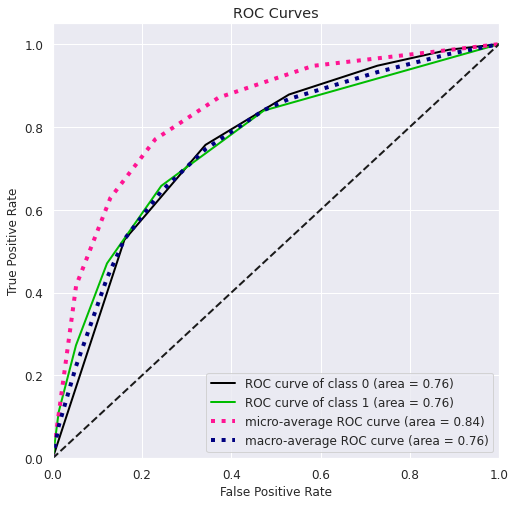

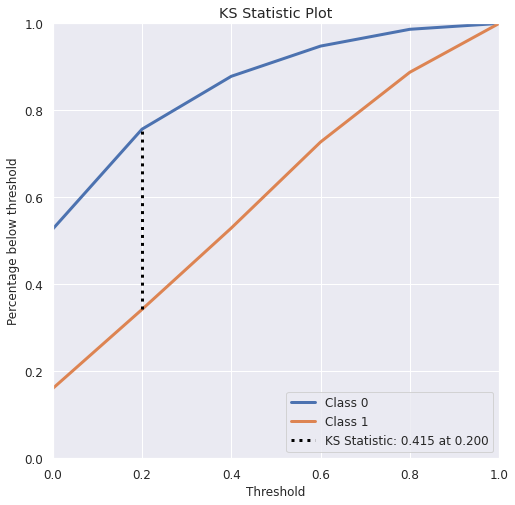

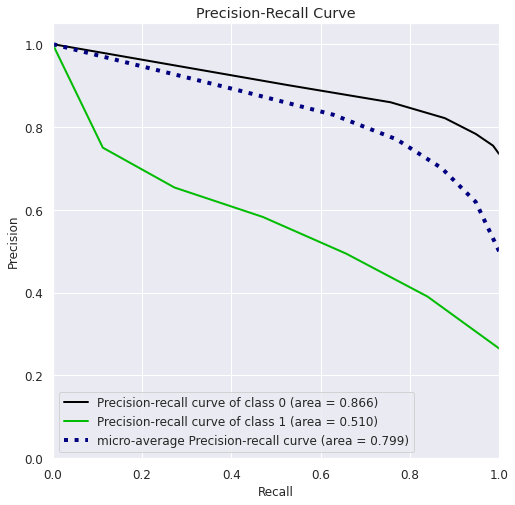

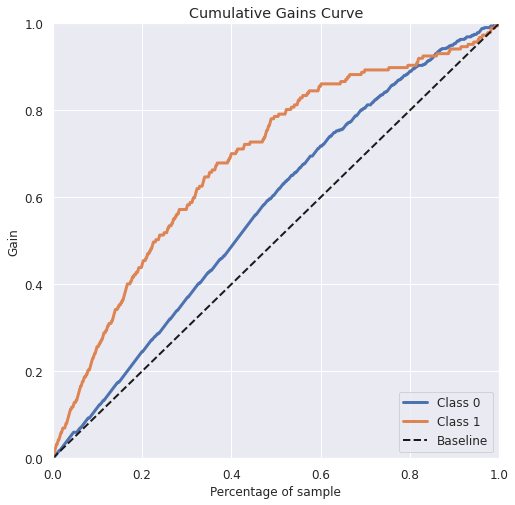

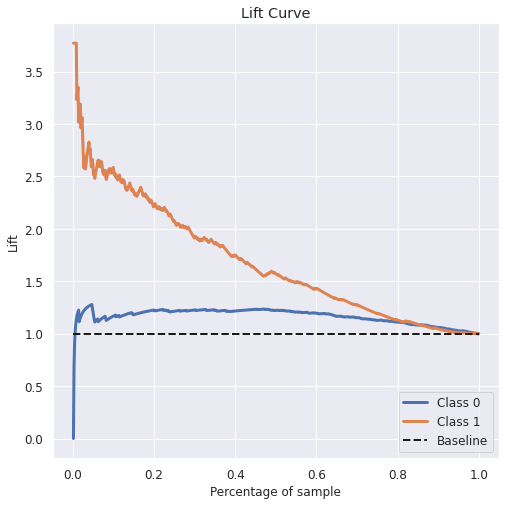

In [25]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import seaborn as sns
import scikitplot as skplt

# create a 90/10 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.1, stratify = y)

from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])
#predictions_test_xgb = np.zeros(len(test_df))
num_of_folds = 10
num_fold = 0
    #feature_importance_df = pd.DataFrame()

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Stratified Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_knn = KNeighborsClassifier()

    clf_stra_knn.fit(xtrain_stra, ytrain_stra)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    #fold_importance_df["fold"] = n_fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions = clf_stra_knn.predict(xvalid)
    predictions_probas = clf_stra_knn.predict_proba(xvalid)
    predictions_probas_list += predictions_probas/num_of_folds

    #predictions_test_xgb += clf_stra_xgb.predict_proba(test_df[xtrain.columns])[:,1]/num_of_folds


predictions = np.argmax(predictions_probas_list, axis=1)

print()
print(classification_report(yvalid, predictions))

print()
print("CV f1_score", f1_score(yvalid, predictions, average = "macro"))

print()
print("CV roc_auc_score", roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro"))

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

#sns.set(rc={'figure.figsize':(12, 38)})
#xgb.plot_importance(clf_stra_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

clf_stats_df = clf_stats_df.append({"clf_name": "clf_stra_knn",
                     "F1-score":f1_score(yvalid, predictions, average = "macro"),
                     "auc-score": roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro")}, ignore_index=True)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()
import gc
gc.collect();

<a id="s5_3_3"></a>
# Naive Bayes


Stratified Fold: 0


Stratified Fold: 1


Stratified Fold: 2


Stratified Fold: 3


Stratified Fold: 4


Stratified Fold: 5


Stratified Fold: 6


Stratified Fold: 7


Stratified Fold: 8


Stratified Fold: 9


              precision    recall  f1-score   support

           0       0.89      0.67      0.77       518
           1       0.46      0.78      0.58       187

    accuracy                           0.70       705
   macro avg       0.68      0.73      0.68       705
weighted avg       0.78      0.70      0.72       705


CV f1_score 0.6751978868666304

CV roc_auc_score 0.8196374372844961

elapsed time in seconds:  0.38124966621398926



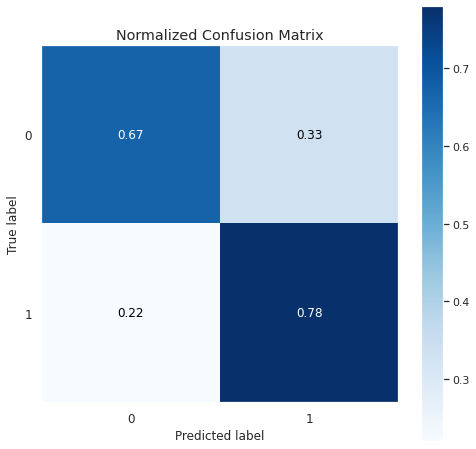

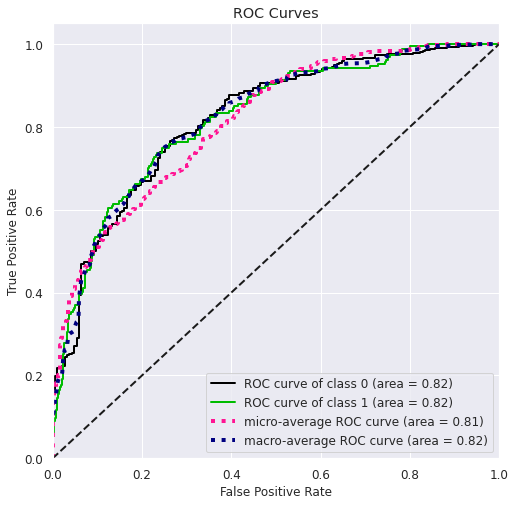

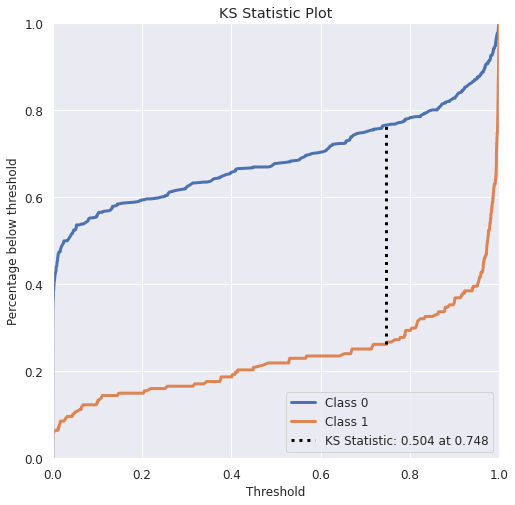

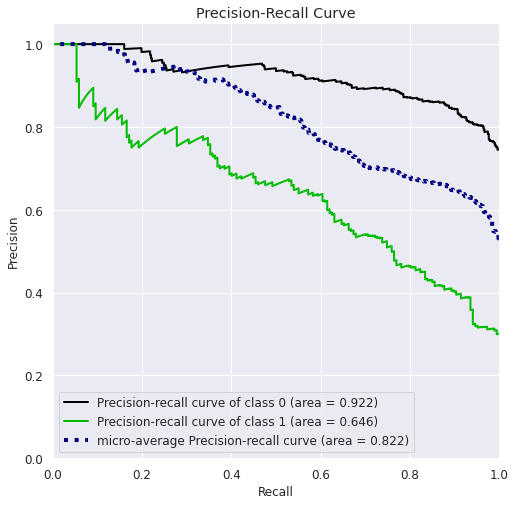

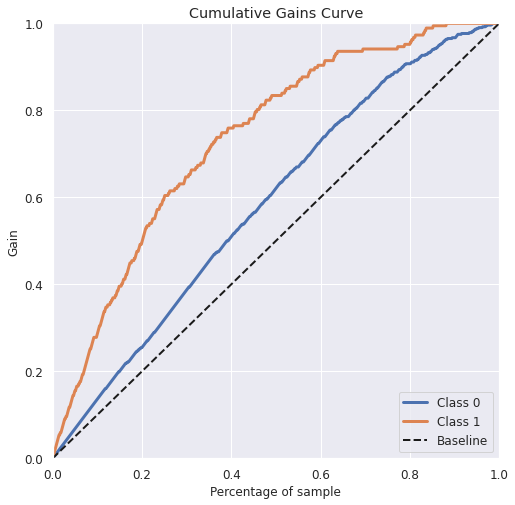

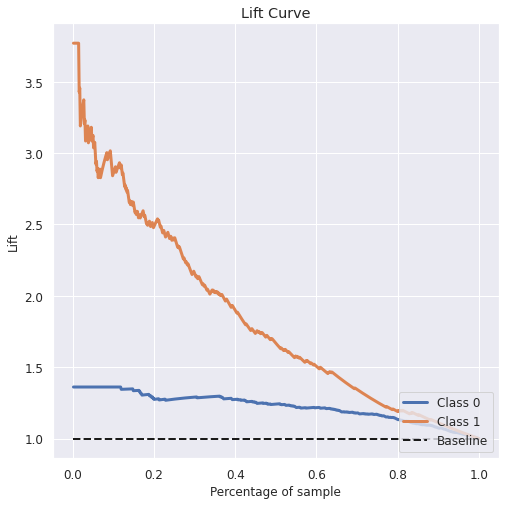

In [26]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import seaborn as sns
import scikitplot as skplt

# create a 90/10 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.1, stratify = y)

from sklearn.naive_bayes import CategoricalNB

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])
#predictions_test_xgb = np.zeros(len(test_df))
num_of_folds = 10
num_fold = 0
    #feature_importance_df = pd.DataFrame()

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Stratified Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_bayes = CategoricalNB()

    clf_stra_bayes.fit(xtrain_stra, ytrain_stra)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    #fold_importance_df["fold"] = n_fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions = clf_stra_bayes.predict(xvalid)
    predictions_probas = clf_stra_bayes.predict_proba(xvalid)
    predictions_probas_list += predictions_probas/num_of_folds

    #predictions_test_xgb += clf_stra_xgb.predict_proba(test_df[xtrain.columns])[:,1]/num_of_folds


predictions = np.argmax(predictions_probas_list, axis=1)

print()
print(classification_report(yvalid, predictions))

print()
print("CV f1_score", f1_score(yvalid, predictions, average = "macro"))

print()
print("CV roc_auc_score", roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro"))

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

#sns.set(rc={'figure.figsize':(12, 38)})
#xgb.plot_importance(clf_stra_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

clf_stats_df = clf_stats_df.append({"clf_name": "clf_stra_bayes",
                     "F1-score":f1_score(yvalid, predictions, average = "macro"),
                     "auc-score": roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro")}, ignore_index=True)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()
import gc
gc.collect();

<a id="s5_3_5"></a>
# Baseline Random Forest


Stratified Fold: 0


Stratified Fold: 1


Stratified Fold: 2


Stratified Fold: 3


Stratified Fold: 4


Stratified Fold: 5


Stratified Fold: 6


Stratified Fold: 7


Stratified Fold: 8


Stratified Fold: 9


              precision    recall  f1-score   support

           0       0.83      0.92      0.87       518
           1       0.67      0.48      0.56       187

    accuracy                           0.80       705
   macro avg       0.75      0.70      0.71       705
weighted avg       0.79      0.80      0.79       705


CV f1_score 0.7129873853211011

CV roc_auc_score 0.8319224495695084

elapsed time in seconds:  8.213775873184204



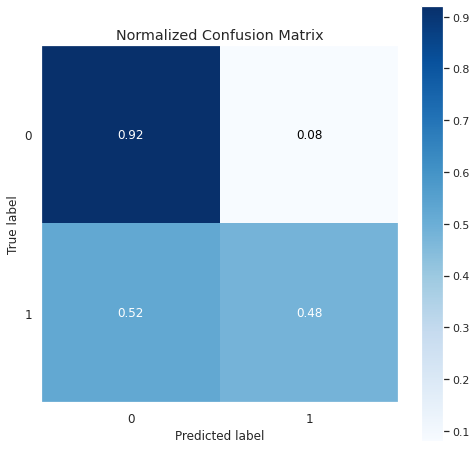

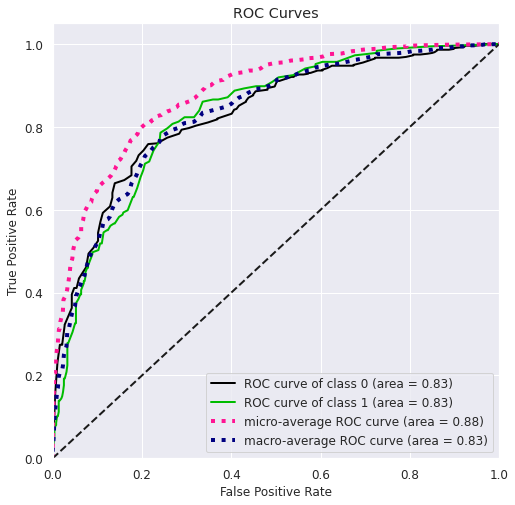

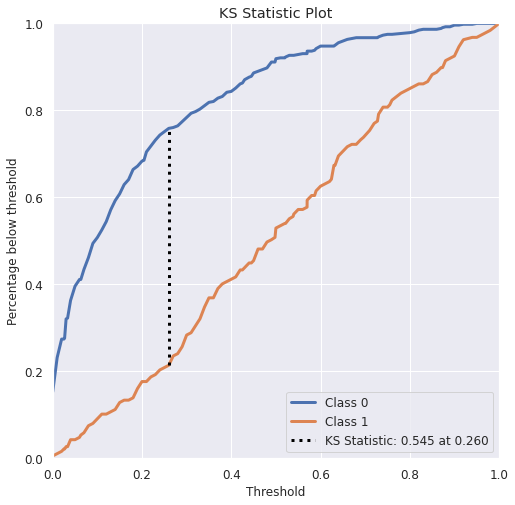

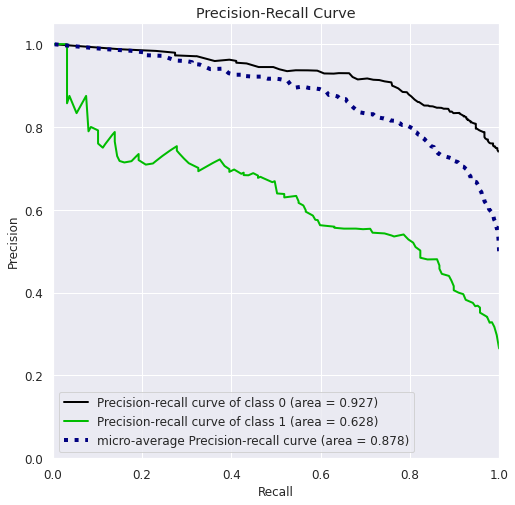

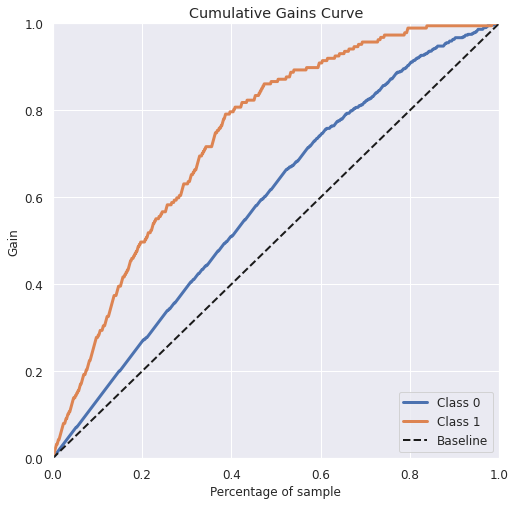

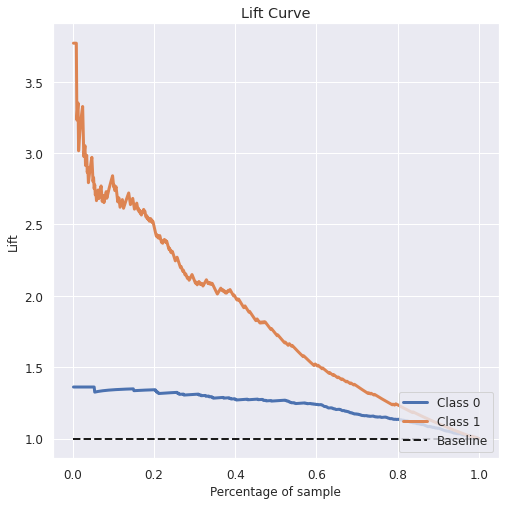

In [27]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import seaborn as sns
import scikitplot as skplt

# create a 90/10 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.1, stratify = y)

from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])
#predictions_test_xgb = np.zeros(len(test_df))
num_of_folds = 10
num_fold = 0
    #feature_importance_df = pd.DataFrame()

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Stratified Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_rf = RandomForestClassifier()

    clf_stra_rf.fit(xtrain_stra, ytrain_stra)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    #fold_importance_df["fold"] = n_fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions = clf_stra_rf.predict(xvalid)
    predictions_probas = clf_stra_rf.predict_proba(xvalid)
    predictions_probas_list += predictions_probas/num_of_folds

    #predictions_test_xgb += clf_stra_xgb.predict_proba(test_df[xtrain.columns])[:,1]/num_of_folds


predictions = np.argmax(predictions_probas_list, axis=1)

print()
print(classification_report(yvalid, predictions))

print()
print("CV f1_score", f1_score(yvalid, predictions, average = "macro"))

print()
print("CV roc_auc_score", roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro"))

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

#sns.set(rc={'figure.figsize':(12, 38)})
#xgb.plot_importance(clf_stra_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

clf_stats_df = clf_stats_df.append({"clf_name": "clf_stra_rf",
                     "F1-score":f1_score(yvalid, predictions, average = "macro"),
                     "auc-score": roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro")}, ignore_index=True)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()
import gc
gc.collect();

<a id="s5_3_5"></a>
# Baseline Xgboost


Stratified Fold: 0

[0]	validation_0-auc:0.85670	validation_1-auc:0.82144
[102]	validation_0-auc:0.98604	validation_1-auc:0.82025

Stratified Fold: 1

[0]	validation_0-auc:0.85721	validation_1-auc:0.80438
[118]	validation_0-auc:0.99119	validation_1-auc:0.81928

Stratified Fold: 2

[0]	validation_0-auc:0.85438	validation_1-auc:0.85641
[125]	validation_0-auc:0.98770	validation_1-auc:0.85461

Stratified Fold: 3

[0]	validation_0-auc:0.85522	validation_1-auc:0.83667
[121]	validation_0-auc:0.98962	validation_1-auc:0.83765

Stratified Fold: 4

[0]	validation_0-auc:0.85604	validation_1-auc:0.82814
[108]	validation_0-auc:0.98612	validation_1-auc:0.83478

Stratified Fold: 5

[0]	validation_0-auc:0.85457	validation_1-auc:0.84005
[119]	validation_0-auc:0.98911	validation_1-auc:0.83828

Stratified Fold: 6

[0]	validation_0-auc:0.85628	validation_1-auc:0.82576
[108]	validation_0-auc:0.98738	validation_1-auc:0.81624

Stratified Fold: 7

[0]	validation_0-auc:0.85572	validation_1-auc:0.83730
[102]	va

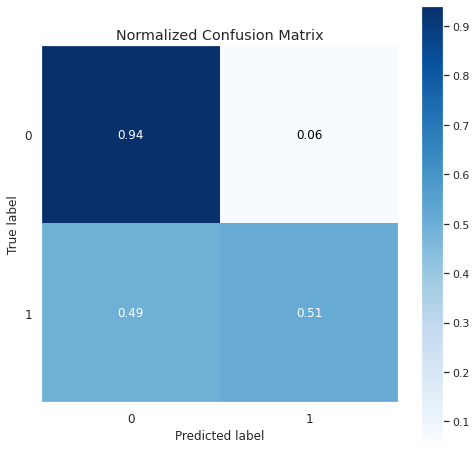

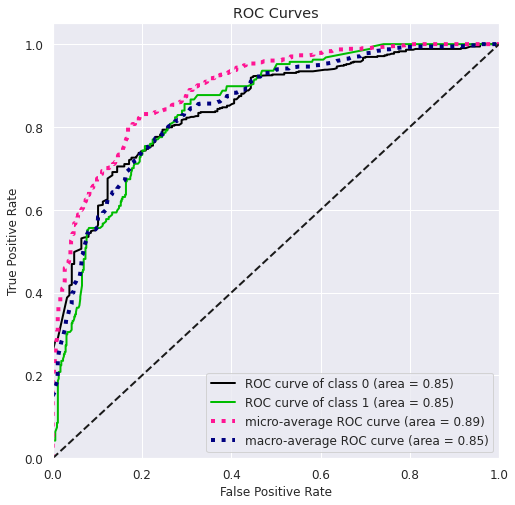

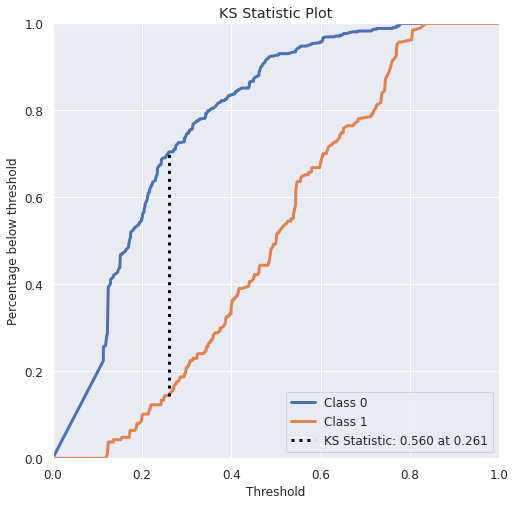

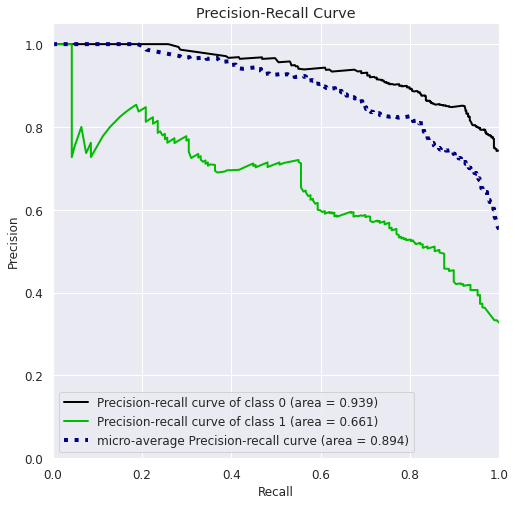

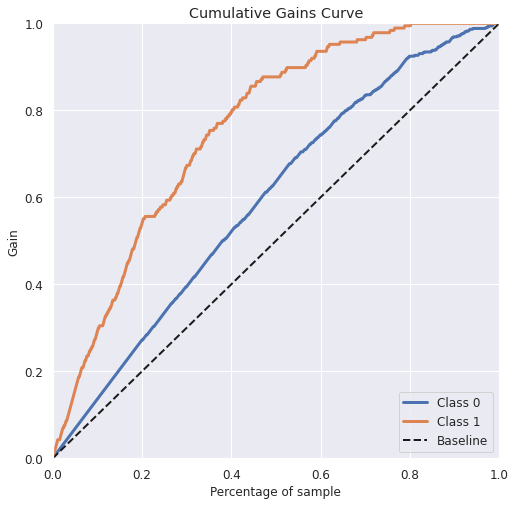

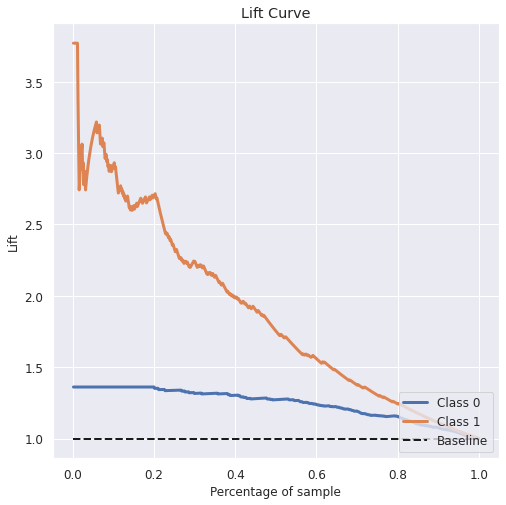

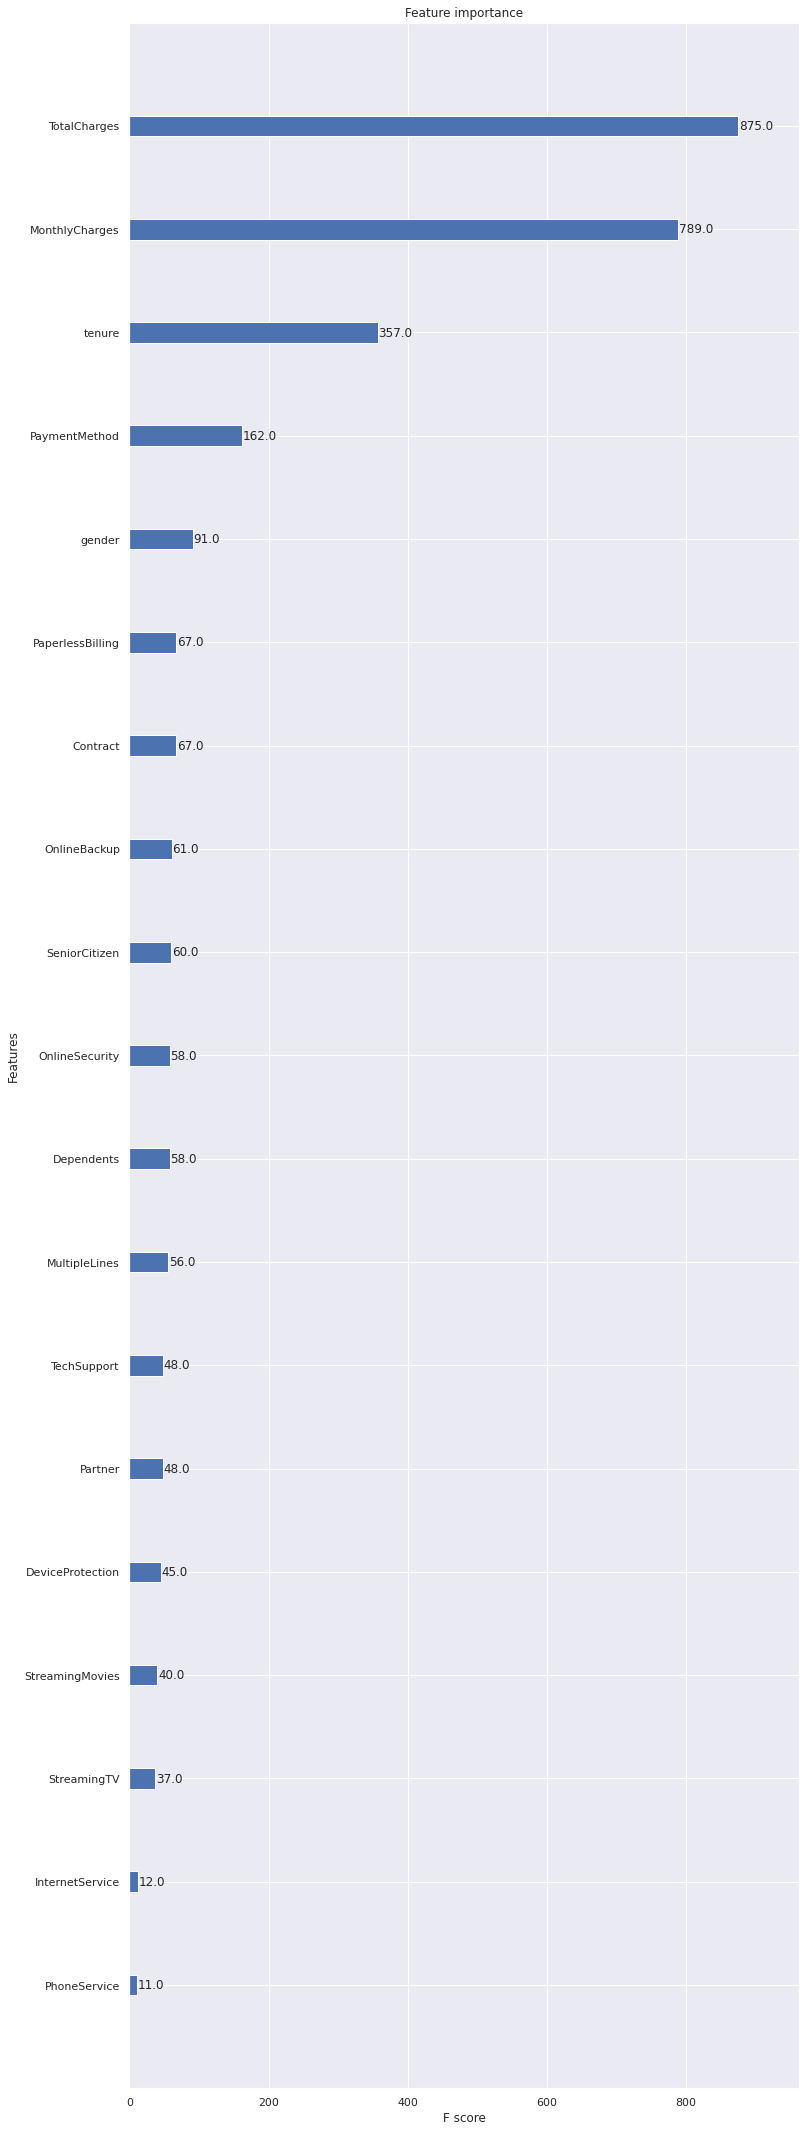

In [28]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import seaborn as sns
import scikitplot as skplt

# create a 90/10 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.1, stratify = y)

import xgboost as xgb

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])
#predictions_test_xgb = np.zeros(len(test_df))
num_of_folds = 10
num_fold = 0
    #feature_importance_df = pd.DataFrame()

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Stratified Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_xgb = xgb.XGBClassifier(n_estimators = 4000,
                                     objective= 'binary:logistic',
                                     nthread=-1,
                                     seed=42,
                                    early_stopping_rounds=100,
                                    eval_metric='auc')

    clf_stra_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                  verbose=250)

    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    #fold_importance_df["fold"] = n_fold + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions = clf_stra_xgb.predict(xvalid)
    predictions_probas = clf_stra_xgb.predict_proba(xvalid)
    predictions_probas_list += predictions_probas/num_of_folds

    #predictions_test_xgb += clf_stra_xgb.predict_proba(test_df[xtrain.columns])[:,1]/num_of_folds


predictions = np.argmax(predictions_probas_list, axis=1)

print()
print(classification_report(yvalid, predictions))

print()
print("CV f1_score", f1_score(yvalid, predictions, average = "macro"))

print()
print("CV roc_auc_score", roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro"))

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(12, 38)})
xgb.plot_importance(clf_stra_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

clf_stats_df = clf_stats_df.append({"clf_name": "clf_stra_xgb",
                     "F1-score":f1_score(yvalid, predictions, average = "macro"),
                     "auc-score": roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro")}, ignore_index=True)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()
import gc
gc.collect();

<a id="s5_3_6"></a>
# Inspecting the Baseline Models' performance

- All models (except for Naive Bayes) struggle to correctly predict the class 1, the customers who will churn. Although I would like to reduce the number of features based on feature importances from the xgboost classifier.

- NaiveBayes somehow showed really good performance to correctly predict the Churn class, however misplaced some of the customers who didn't Churn as churned customers

In [29]:
clf_stats_df

,clf_name,F1-score,auc-score
0,clf_stra_logit,0.735523,0.849823
1,clf_stra_svc,0.541753,0.696230
2,clf_stra_knn,0.686064,0.776175
3,clf_stra_bayes,0.675198,0.819637
4,clf_stra_rf,0.712987,0.831922
5,clf_stra_xgb,0.747125,0.847836


# Building models with importance features

soon...

<font size="+1" color='blue'><b> I hope you enjoyed this kernel , Please don't forget to appreciate me with an Upvote.</b></font>

<img src="https://media4.giphy.com/media/l3q2FnW3yZRJVZH2g/giphy.gif?cid=790b76113d4f5dbec5dc126ec0917b7aefd3aabbdefd3130&rid=giphy.gif" alt="Thank You Gif Professional, HD Png Download@kindpng.com">